In [1]:
import pandas as pd
from scipy.stats import ttest_rel, mannwhitneyu, wilcoxon, shapiro

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import seaborn as sns


In [4]:
# Загрузка данных из Excel файла

file_path = r'C:\Users\Алибек\Пример данных (4).xlsx'
data_a = pd.read_excel(file_path, sheet_name='Точка А')
data_b = pd.read_excel(file_path, sheet_name='Точка Б')
attendance = pd.read_excel(file_path, sheet_name='Посещение уроков проработки')

In [5]:
attendance = attendance[attendance.columns[1:29]]
# Убираю 2 колонки, так как там никто почти не присутствовал 
attendance.drop(['Насилие сексуальное', 'Непринятие/исключение родственника/рода'], axis = 1, inplace = True)
print(attendance.shape)
attendance.head(1)

(38, 26)


,"Злость, агрессия, не терпеть/защитить себя/уязвимость",Тайна,Вторичная выгода/страх ответственности,Разделение с маминым страхом/задачей,"Границы, не быть удобным",Непринятие себя,Страх оценки/критики/насмешки,Стыд,Тема скорости,"Позволение сказать «Нет», «Не хочу»",...,"Незнание и непонимание своих чувств, эмоций и ощущений",Насилие физическое,Насилие моральное,Родительские стратегии,Опасный мир/люди,Нет права голос/страх сказать/проявляться,"Урок ""Ораторское искусство"" №1","Урок ""Ораторское искусство"" №2","Урок ""Ораторское искусство"" №3","Урок ""Ораторское искусство"" №4"
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1


In [6]:
# Создаем словарь для переименования
rename_map_a_to_b = {
    'Шкала Спилберга-Ханина. 01. Шкала ситуативной тревожности.': 'Шкала Спилберга-Ханина. Шкала ситуативной тревожности',
    'Шкала Спилберга-Ханина. 01. Шкала личностной тревожности': 'Шкала Спилберга-Ханина. Шкала личностной тревожности',
    'Шкала депрессии Бека. 01. Когнитивно-аффективные проявления.': 'Шкала депрессии Бека. Когнитивно-аффективные проявления',
    'Шкала депрессии Бека. 01. Соматические проявления.': 'Шкала депрессии Бека. Соматические проявления',
    'Шкала нервно-психического напряжения. 01': 'Шкала нервно-психического напряжения'
}

rename_map_b_to_a = {
    'Шкала Спилберга-Ханина. 02. Шкала ситуативной тревожности.': 'Шкала Спилберга-Ханина. Шкала ситуативной тревожности',
    'Шкала Спилберга-Ханина. 02. Шкала личностной тревожности': 'Шкала Спилберга-Ханина. Шкала личностной тревожности',
    'Шкала депрессии Бека. 02. Когнитивно-аффективные проявления.': 'Шкала депрессии Бека. Когнитивно-аффективные проявления',
    'Шкала депрессии Бека. 02. Соматические проявления.': 'Шкала депрессии Бека. Соматические проявления',
    'Шкала нервно-психического напряжения. 02': 'Шкала нервно-психического напряжения'
}

# Приведение названий столбцов к единому виду
data_a = data_a.rename(columns=rename_map_a_to_b)
data_b = data_b.rename(columns=rename_map_b_to_a)

# Приведение данных в порядок 
common_columns = data_a.columns.intersection(data_b.columns)
data_a = data_a[common_columns]
data_b = data_b[common_columns]

# Убираем ненужные строки и колонки
data_a.drop(data_a.index[38:], inplace=True)
data_b.drop(data_b.index[38:], inplace=True)

data_a = data_a.iloc[:, :64]
data_b = data_b.iloc[:, :64]

In [7]:
data_a.head(1)

,ID участника,1. Как часто вы можете говорить бегло?,2. Насколько последовательно вам удается поддерживать беглость речи изо дня в день?,"3. Как часто вы используете приемы, которым научились на занятиях по логопедии?","4. Как часто вы говорите именно то, что хотите сказать, даже если думаете, что можете заикаться?",1. Заикании в целом,"2. Факторах, влияющих на заикание","3. Том, что происходит с вашей речью, когда вы заикаетесь","4. Вариантах лечения для людей, которые заикаются",1. Вашим речевым способностям,...,Степень выраженности заикания: от 1-10,Спонтанная речь,Чтение,Пересказ,Вопрос-ответ (диалог),Сопряженная речь,Отраженная речь,Стихотворная,Шепотная,Комментарий заиколога (судороги)
0,53935.0,Часто,Всегда,Редко,Никогда,Ничего,Ничего,Ничего,Немного,Очень отрицательно,...,3,3.0,4,3.0,3.0,5.0,4.0,5.0,4.0,NaN


In [8]:
data_b.head(1)

,ID участника,1. Как часто вы можете говорить бегло?,2. Насколько последовательно вам удается поддерживать беглость речи изо дня в день?,"3. Как часто вы используете приемы, которым научились на занятиях по логопедии?","4. Как часто вы говорите именно то, что хотите сказать, даже если думаете, что можете заикаться?",1. Заикании в целом,"2. Факторах, влияющих на заикание","3. Том, что происходит с вашей речью, когда вы заикаетесь","4. Вариантах лечения для людей, которые заикаются",1. Вашим речевым способностям,...,Степень выраженности заикания: от 1-10,Спонтанная речь,Чтение,Пересказ,Вопрос-ответ (диалог),Сопряженная речь,Отраженная речь,Стихотворная,Шепотная,Комментарий заиколога (судороги)
0,53935.0,Иногда,Часто,Иногда,Часто,Немного,Немного,Немного,Немного,Очень отрицательно,...,3,3,3,3,3,4.0,5.0,4.0,5.0,NaN


In [9]:
data_a.shape, data_b.shape

((38, 64), (38, 64))

In [10]:
scale_map_1 = {
    'Всегда': 5,
    'Часто': 4,
    'Иногда': 3,
    'Редко': 2,
    'Никогда': 1
}

scale_map_2 = {
    'В высшей степени': 5,
    'Очень': 4,
    'Отчасти': 3,
    'Немного': 2,
    'Ничего': 1
}

scale_map_3 = {
    'Очень положительно': 5,
    'Немного положительно': 4,
    'Средне': 3,
    'Немного отрицательно': 2,
    'Очень отрицательно': 1
}


scale_map_4 = {
    'Никогда': 5,
    'Редко': 4,
    'Иногда': 3,
    'Часто': 2,
    'Всегда': 1
}

scale_map_5 = {
    'Категорически не согласен': 5,
    'Несколько не согласен': 4,
    'Нейтрально': 3,
    'Отчасти согласен': 2,
    'Полностью согласен': 1
}

scale_map_6 = {
    'Совсем не сложно': 5,
    'Не очень сложно': 4,
    'Немного сложно': 3,
    'Очень сложно': 2,
    'Крайне сложно': 1
}

In [11]:
# Сопоставляем колонки с соответствующими шкалами
columns_to_transform = {
    '1. Как часто вы можете говорить бегло?': scale_map_1,
    '2. Насколько последовательно вам удается поддерживать беглость речи изо дня в день?': scale_map_1,
    '3. Как часто вы используете приемы, которым научились на занятиях по логопедии?': scale_map_1,
    '4. Как часто вы говорите именно то, что хотите сказать, даже если думаете, что можете заикаться?': scale_map_1,
    
    '1. Заикании в целом': scale_map_2,
    '2. Факторах, влияющих на заикание': scale_map_2,
    '3. Том, что происходит с вашей речью, когда вы заикаетесь': scale_map_2,
    '4. Вариантах лечения для людей, которые заикаются': scale_map_2,
    
    '1. Вашим речевым способностям': scale_map_3,
    '2. Вашей способности общаться (т.е. доносить свое сообщение до слушателей независимо от плавности речи)': scale_map_3,
    '3. Тому как Вы звучите, когда говорите': scale_map_3,
    '4. Методам беглой речи': scale_map_3,
    '5. Вашей способности использовать методы, которым вы учились при коррекции речи': scale_map_3,
    '6. Тому, чтобы быть человеком, который заикается': scale_map_3,
    '7. Программам коррекции речи, которые вы посещали в последний раз': scale_map_3,
    '8. Тому, чтобы быть идентифицированным другими людьми как заика/человек, который заикается': scale_map_3,
    
    '1. Беспомощный': scale_map_4,
    '2. Злой': scale_map_4,
    '3. Стыдящийся': scale_map_4,
    '4. Одинокий': scale_map_4,
    '5. Тревожный': scale_map_4,
    '6. Подавленный': scale_map_4,
    '7. Смущенный': scale_map_4,
    '8. Расстроенный': scale_map_4,
    
    '1. Я думаю о своем заикании почти все время': scale_map_5,
    '2. Мнение людей обо мне в первую очередь основано на том, как я говорю': scale_map_5,
    '3. Если бы я не заикался, я бы смог лучше достичь своих целей в жизни': scale_map_5,
    '4. Я не хочу, чтобы люди знали, что я заикаюсь': scale_map_5,
    '5. Когда я заикаюсь, я ничего не могу с этим поделать': scale_map_5,
    '6. Люди должны делать все возможное, чтобы уберечь себя от заикания': scale_map_5,
    '7. Я не могу принять тот факт, что я заикаюсь': scale_map_5,
    '8. Я не уверен в своих способностях как оратора': scale_map_5,
    
    '1. Испытываете физическое напряжение при заикании': scale_map_4,
    '2. Испытываете физическое напряжение при беглой речи': scale_map_4,
    '3. При заикании проявляете моргание глаз, гримасы лица, движения рук и т. д.': scale_map_4,
    '4. Прерываете зрительный контакт или избегаете смотреть на своего слушателя': scale_map_4,
    '5. Избегаете разговоров в определенных ситуациях или с определенными людьми': scale_map_4,
    '6. Используете слова-заполнители или стартеры (например, «гм», прочищая горло) или используете что-то в своей речи.': scale_map_4,
    '7. Испытываете период усиленного заикания сразу после того, как вы запнулись на слове': scale_map_4,
    '8. Позволяете кому-то сказать за Вас': scale_map_4,    
    
    '1. Разговор с другим человеком один на один': scale_map_6,
    '2. Говорить в условиях нехватки времени': scale_map_6,
    '3. Выступление перед небольшой группой людей': scale_map_6,
    '4. Выступать перед большой группой людей': scale_map_6,
    '5. Разговаривать с людьми, которых Вы хорошо знаете (например, друзья)': scale_map_6,
    '6. Разговаривать с людьми, которых Вы не очень хорошо знаете (например, прохожие)': scale_map_6,
    '7. Инициирование разговоров с другими людьми (представление себя)': scale_map_6,
    '8. Постоять за себя устно (отстаивая свое мнение, бросая вызов тому, кто пролезает вперед в очередь)': scale_map_6,    
    
}

In [12]:
# Преобразуем каждую колонку с помощью соответствующей шкалы
for column, scale_map in columns_to_transform.items():
    data_a[column] = data_a[column].map(scale_map)
    
for column, scale_map in columns_to_transform.items():
    data_b[column] = data_b[column].map(scale_map)

In [13]:
data_b.head()

,ID участника,1. Как часто вы можете говорить бегло?,2. Насколько последовательно вам удается поддерживать беглость речи изо дня в день?,"3. Как часто вы используете приемы, которым научились на занятиях по логопедии?","4. Как часто вы говорите именно то, что хотите сказать, даже если думаете, что можете заикаться?",1. Заикании в целом,"2. Факторах, влияющих на заикание","3. Том, что происходит с вашей речью, когда вы заикаетесь","4. Вариантах лечения для людей, которые заикаются",1. Вашим речевым способностям,...,Степень выраженности заикания: от 1-10,Спонтанная речь,Чтение,Пересказ,Вопрос-ответ (диалог),Сопряженная речь,Отраженная речь,Стихотворная,Шепотная,Комментарий заиколога (судороги)
0,53935.0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,...,3,3,3,3,3,4.0,5.0,4.0,5.0,NaN
1,51413.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,...,5 (1),5,5,4,5,5.0,5.0,5.0,5.0,2и6
2,51363.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,2.0,4.0,...,3,3,5(1),4,3,5.0,4.0,5.0,5.0,NaN
3,50647.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,5,5,5,5,5,5.0,5.0,5.0,5.0,-1
4,50537.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0,5.0,...,4,4,4,4,4,4.0,4.0,4.0,5.0,NaN


In [14]:
def normalize_value(value):
    if 0 <= value <= 10:  # Значения из шкалы 0-10
        return value
    elif 20 <= value <= 80:  # Значения из шкалы 20-80
        return (value - 20) / (80 - 20) * 10
    else:
        return None  # Для некорректных данных (если такие есть)

In [15]:
# Указываем колонки, которые нужно преобразовать 
columns_to_normalize = ['Шкала Спилберга-Ханина. Шкала ситуативной тревожности', 
                        'Шкала Спилберга-Ханина. Шкала личностной тревожности']

data_a[columns_to_normalize] = data_a[columns_to_normalize].apply(pd.to_numeric, errors = 'coerce')
data_b[columns_to_normalize] = data_b[columns_to_normalize].apply(pd.to_numeric, errors = 'coerce')

In [16]:
# Применяем функцию normalize_value к каждой колонке 
for column in columns_to_normalize:
    data_a[column] = data_a[column].map(normalize_value)
    data_b[column] = data_b[column].map(normalize_value)

In [17]:
# Определим интересующие нас колонки
columns_to_check = [
    'Шкала Спилберга-Ханина. Шкала ситуативной тревожности',
    'Шкала Спилберга-Ханина. Шкала личностной тревожности',
    'Шкала депрессии Бека. Когнитивно-аффективные проявления',
    'Шкала депрессии Бека. Соматические проявления',
    'Шкала нервно-психического напряжения'
]

# Проверим тип данных для указанных колонок
formats_data_a = data_a[columns_to_check].dtypes
formats_data_b = data_b[columns_to_check].dtypes

formats_data_a, formats_data_b

(Шкала Спилберга-Ханина. Шкала ситуативной тревожности      float64
 Шкала Спилберга-Ханина. Шкала личностной тревожности       float64
 Шкала депрессии Бека. Когнитивно-аффективные проявления     object
 Шкала депрессии Бека. Соматические проявления               object
 Шкала нервно-психического напряжения                        object
 dtype: object,
 Шкала Спилберга-Ханина. Шкала ситуативной тревожности      float64
 Шкала Спилберга-Ханина. Шкала личностной тревожности       float64
 Шкала депрессии Бека. Когнитивно-аффективные проявления     object
 Шкала депрессии Бека. Соматические проявления               object
 Шкала нервно-психического напряжения                        object
 dtype: object)

In [18]:
# Уточним столбцы, которые необходимо преобразовать
columns_to_convert = [
    'Шкала депрессии Бека. Когнитивно-аффективные проявления',
    'Шкала депрессии Бека. Соматические проявления',
    'Шкала нервно-психического напряжения'
]

# Преобразуем указанные столбцы в числовой формат
data_a[columns_to_convert] = data_a[columns_to_convert].apply(pd.to_numeric, errors='coerce')
data_b[columns_to_convert] = data_b[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [19]:
data_a.head()

,ID участника,1. Как часто вы можете говорить бегло?,2. Насколько последовательно вам удается поддерживать беглость речи изо дня в день?,"3. Как часто вы используете приемы, которым научились на занятиях по логопедии?","4. Как часто вы говорите именно то, что хотите сказать, даже если думаете, что можете заикаться?",1. Заикании в целом,"2. Факторах, влияющих на заикание","3. Том, что происходит с вашей речью, когда вы заикаетесь","4. Вариантах лечения для людей, которые заикаются",1. Вашим речевым способностям,...,Степень выраженности заикания: от 1-10,Спонтанная речь,Чтение,Пересказ,Вопрос-ответ (диалог),Сопряженная речь,Отраженная речь,Стихотворная,Шепотная,Комментарий заиколога (судороги)
0,53935.0,4,5,2,1,1,1,1,2,1,...,3,3.0,4,3.0,3.0,5.0,4.0,5.0,4.0,NaN
1,51413.0,4,4,1,4,2,2,2,2,3,...,5,5.0,5,4.0,5.0,5.0,5.0,5.0,5.0,2и6
2,51363.0,3,2,2,4,2,2,1,2,5,...,4,4.0,5,4.0,4.0,5.0,5.0,5.0,5.0,NaN
3,50647.0,3,3,4,4,3,3,4,2,2,...,4,5.0,5,4.0,4.0,5.0,5.0,5.0,5.0,NaN
4,50537.0,4,4,1,3,5,4,3,4,4,...,3,3.0,3,3.0,3.0,4.0,3.0,4.0,5.0,NaN


In [20]:
data_b.head()

,ID участника,1. Как часто вы можете говорить бегло?,2. Насколько последовательно вам удается поддерживать беглость речи изо дня в день?,"3. Как часто вы используете приемы, которым научились на занятиях по логопедии?","4. Как часто вы говорите именно то, что хотите сказать, даже если думаете, что можете заикаться?",1. Заикании в целом,"2. Факторах, влияющих на заикание","3. Том, что происходит с вашей речью, когда вы заикаетесь","4. Вариантах лечения для людей, которые заикаются",1. Вашим речевым способностям,...,Степень выраженности заикания: от 1-10,Спонтанная речь,Чтение,Пересказ,Вопрос-ответ (диалог),Сопряженная речь,Отраженная речь,Стихотворная,Шепотная,Комментарий заиколога (судороги)
0,53935.0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,...,3,3,3,3,3,4.0,5.0,4.0,5.0,NaN
1,51413.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,...,5 (1),5,5,4,5,5.0,5.0,5.0,5.0,2и6
2,51363.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,2.0,4.0,...,3,3,5(1),4,3,5.0,4.0,5.0,5.0,NaN
3,50647.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,5,5,5,5,5,5.0,5.0,5.0,5.0,-1
4,50537.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0,5.0,...,4,4,4,4,4,4.0,4.0,4.0,5.0,NaN


In [21]:
formats_data_a = data_a[columns_to_check].dtypes
formats_data_b = data_b[columns_to_check].dtypes

formats_data_a, formats_data_b

(Шкала Спилберга-Ханина. Шкала ситуативной тревожности      float64
 Шкала Спилберга-Ханина. Шкала личностной тревожности       float64
 Шкала депрессии Бека. Когнитивно-аффективные проявления      int64
 Шкала депрессии Бека. Соматические проявления                int64
 Шкала нервно-психического напряжения                         int64
 dtype: object,
 Шкала Спилберга-Ханина. Шкала ситуативной тревожности      float64
 Шкала Спилберга-Ханина. Шкала личностной тревожности       float64
 Шкала депрессии Бека. Когнитивно-аффективные проявления    float64
 Шкала депрессии Бека. Соматические проявления              float64
 Шкала нервно-психического напряжения                       float64
 dtype: object)

# Проверка нормальности разностей для понимания какой тест лучше использовать

Shapiro-Wilk Test: Statistic=0.9252993325073764, P-value=0.029018766840422247
Разности не нормально распределены. Используйте Wilcoxon Signed-Rank Test.

Shapiro-Wilk Test: Statistic=0.9598789600706514, P-value=0.2725875990026094
Разности нормально распределены. Можно использовать парный t-тест.
T тест: T-statistic: [-3.88507889], P-value: [0.99974887]

Shapiro-Wilk Test: Statistic=0.9363580741528945, P-value=0.07259676791363595
Разности нормально распределены. Можно использовать парный t-тест.
T тест: T-statistic: [-2.93064289], P-value: [0.99673342]

Shapiro-Wilk Test: Statistic=0.9705494939427155, P-value=0.5543185751461729
Разности нормально распределены. Можно использовать парный t-тест.
T тест: T-statistic: [-1.49221819], P-value: [0.92677913]

Shapiro-Wilk Test: Statistic=0.9606217900615289, P-value=0.30300339461390446
Разности нормально распределены. Можно использовать парный t-тест.
T тест: T-statistic: [-3.03426427], P-value: [0.99752804]



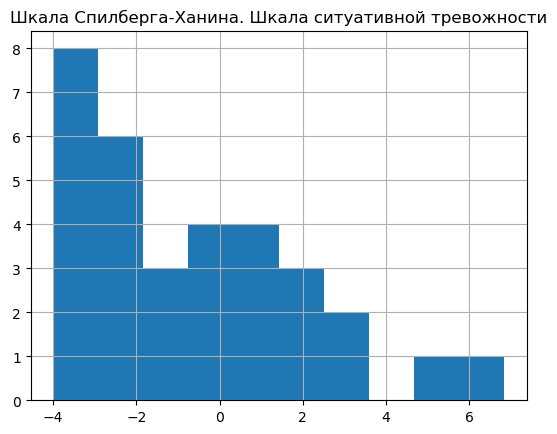

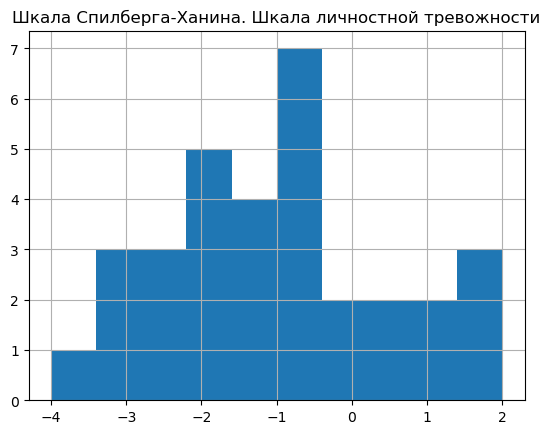

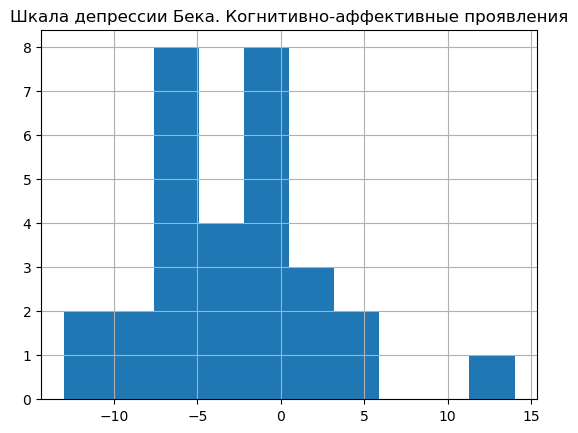

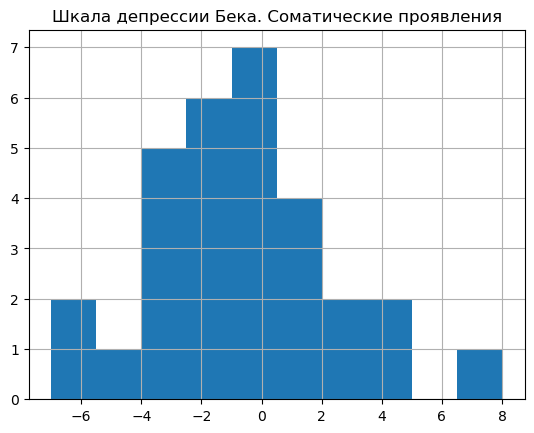

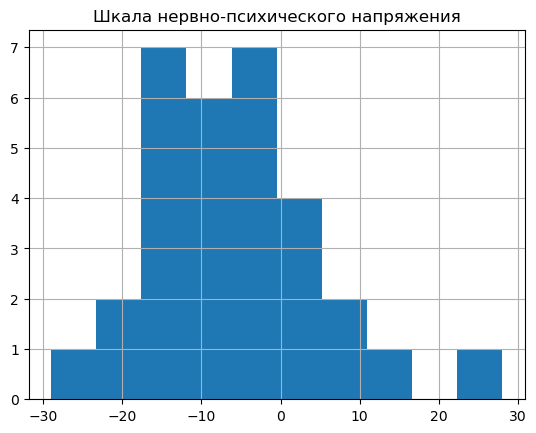

In [22]:
columns_continuous = ['Шкала Спилберга-Ханина. Шкала ситуативной тревожности', 
                     'Шкала Спилберга-Ханина. Шкала личностной тревожности',
                     'Шкала депрессии Бека. Когнитивно-аффективные проявления',
                     'Шкала депрессии Бека. Соматические проявления',
                     'Шкала нервно-психического напряжения']

for i in range(0,5):
    valid_indices = data_b[[columns_continuous[i]]].dropna().index
    
    diff = data_b[[columns_continuous[i]]].loc[valid_indices] - data_a[[columns_continuous[i]]].loc[valid_indices]
    diff.hist()
    
    # Проверка нормальности разностей
    stat, p = shapiro(diff)
    print(f"Shapiro-Wilk Test: Statistic={stat}, P-value={p}")

    if p > 0.05:
        print("Разности нормально распределены. Можно использовать парный t-тест.")
        
        t_stat, p_value = ttest_rel(data_b[[columns_continuous[i]]].loc[valid_indices], data_a[[columns_continuous[i]]].loc[valid_indices], alternative='greater')
        print(f"T тест: T-statistic: {t_stat}, P-value: {p_value}\n")
    else:
        print("Разности не нормально распределены. Используйте Wilcoxon Signed-Rank Test.\n")
        


По результатам выше используем тест Вилкоксона для шкалы Спилберга-Ханина. Шкалы ситуативной тревожности, в котором результат теста показал, что разница незначительная – данные до и после похожи. Нет доказательств, что что-то существенно изменилось между двумя состояниями. Возможно, что эффект отсутствует или слишком мал, чтобы его обнаружить.

Wilcoxon Test: Statistic=148.0, P-value=0.9589655923307505


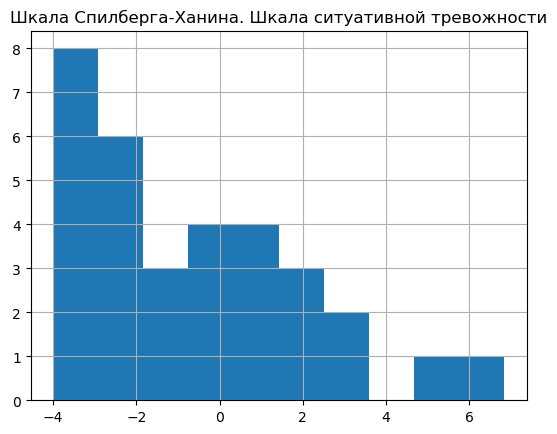

In [23]:
# Так как по Шапиро тесту у нас колонка [Шкала Спилберга-Ханина, Шкала ситуативной тревожности] имеет не 
# нормальное распределение разности
# Мы проводим Вилкоксон тест

valid_indices = data_b[[columns_continuous[0]]].dropna().index
    
diff = data_b[[columns_continuous[0]]].loc[valid_indices] - data_a[[columns_continuous[0]]].loc[valid_indices]
diff.hist()

stat, p_value = wilcoxon(data_b[columns_continuous[0]].loc[valid_indices], data_a[columns_continuous[0]].loc[valid_indices], alternative='greater')
print(f"Wilcoxon Test: Statistic={stat}, P-value={p_value}")

In [24]:
# Исключение ID участника из анализа, если он есть
data_a.drop('ID участника', axis = 1, inplace = True)
data_b.drop('ID участника', axis = 1, inplace = True)

По результатам теста ниже, изменений не выявлено — различия между состояниями (до и после) либо отсутствуют, либо недостаточно выражены, чтобы считаться значимыми.
T-статистика – числовое значение, которое показывает, насколько сильно различаются группы.
P-значение – показывает, есть ли статистически значимые изменения.
Если P-значение больше 0.05 
, это значит, что значимых изменений нет.

In [25]:
columns_scale = data_a.columns[0:48]

for i in range(0,48):
    valid_indices = data_b[[columns_scale[i]]].dropna().index

    stat, p_value = wilcoxon(data_b[columns_scale[i]].loc[valid_indices], data_a[columns_scale[i]].loc[valid_indices], alternative='greater')
    if p_value > 0.05:
        print(columns_scale[i])
        print('НЕ НАЙДЕНЫ изменения')
        print(f"statistic: {stat}, P-value: {p_value}\n")
#    else:
#        print('Найдены изменения')
#        print(columns_scale[i])
#        print(f"statistic: {stat}, P-value: {p_value}\n")

6. Люди должны делать все возможное, чтобы уберечь себя от заикания
НЕ НАЙДЕНЫ изменения
statistic: 227.0, P-value: 0.17403405420846862

3. При заикании проявляете моргание глаз, гримасы лица, движения рук и т. д.
НЕ НАЙДЕНЫ изменения
statistic: 249.0, P-value: 0.06931430606127906

1. Разговор с другим человеком один на один
НЕ НАЙДЕНЫ изменения
statistic: 52.0, P-value: 0.12410653949496181

5. Разговаривать с людьми, которых Вы хорошо знаете (например, друзья)
НЕ НАЙДЕНЫ изменения
statistic: 40.0, P-value: 0.08275892934873508



In [26]:
data_b.head()

,1. Как часто вы можете говорить бегло?,2. Насколько последовательно вам удается поддерживать беглость речи изо дня в день?,"3. Как часто вы используете приемы, которым научились на занятиях по логопедии?","4. Как часто вы говорите именно то, что хотите сказать, даже если думаете, что можете заикаться?",1. Заикании в целом,"2. Факторах, влияющих на заикание","3. Том, что происходит с вашей речью, когда вы заикаетесь","4. Вариантах лечения для людей, которые заикаются",1. Вашим речевым способностям,2. Вашей способности общаться (т.е. доносить свое сообщение до слушателей независимо от плавности речи),...,Степень выраженности заикания: от 1-10,Спонтанная речь,Чтение,Пересказ,Вопрос-ответ (диалог),Сопряженная речь,Отраженная речь,Стихотворная,Шепотная,Комментарий заиколога (судороги)
0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,...,3,3,3,3,3,4.0,5.0,4.0,5.0,NaN
1,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,...,5 (1),5,5,4,5,5.0,5.0,5.0,5.0,2и6
2,2.0,3.0,3.0,4.0,2.0,2.0,2.0,2.0,4.0,5.0,...,3,3,5(1),4,3,5.0,4.0,5.0,5.0,NaN
3,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,5,5,5,5,5,5.0,5.0,5.0,5.0,-1
4,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0,5.0,5.0,...,4,4,4,4,4,4.0,4.0,4.0,5.0,NaN


In [27]:
# Обновление кода с дополнительными колонками для удаления
columns_to_drop = [
    '6. Люди должны делать все возможное, чтобы уберечь себя от заикания',
    '3. При заикании проявляете моргание глаз, гримасы лица, движения рук и т. д.',
    '1. Разговор с другим человеком один на один',
    '5. Разговаривать с людьми, которых Вы хорошо знаете (например, друзья)',
    'Шкала Спилберга-Ханина. Шкала ситуативной тревожности',
    'Шкала Спилберга-Ханина. Шкала личностной тревожности',
    'Шкала депрессии Бека. Когнитивно-аффективные проявления',
    'Шкала депрессии Бека. Соматические проявления',
    'Шкала нервно-психического напряжения',
    'Степень выраженности заикания: от 1-10',
    'Спонтанная речь',
    'Чтение',
    'Пересказ',
    'Вопрос-ответ (диалог)',
    'Сопряженная речь',
    'Отраженная речь',
    'Стихотворная',
    'Шепотная',
    'Комментарий заиколога (судороги)'
]

# Удаление указанных колонок
data_b_filtered = data_b.drop(columns=columns_to_drop, axis=1)

In [28]:
data_b_filtered.shape

(38, 44)

In [29]:
attendance.shape

(38, 26)

In [30]:
data_b_filtered_merged = pd.merge(data_b_filtered, attendance, left_index=True, right_index=True)

In [31]:
data_b_filtered_merged.dropna(inplace = True)

In [32]:
data_b_filtered_merged.shape

(31, 70)

In [33]:
improved_columns = data_b_filtered_merged.columns[0:44]
lesson_columns = data_b_filtered_merged.columns[44:71]

In [34]:
improved_columns.shape

(44,)

In [35]:
data_b_filtered_merged.head()

,1. Как часто вы можете говорить бегло?,2. Насколько последовательно вам удается поддерживать беглость речи изо дня в день?,"3. Как часто вы используете приемы, которым научились на занятиях по логопедии?","4. Как часто вы говорите именно то, что хотите сказать, даже если думаете, что можете заикаться?",1. Заикании в целом,"2. Факторах, влияющих на заикание","3. Том, что происходит с вашей речью, когда вы заикаетесь","4. Вариантах лечения для людей, которые заикаются",1. Вашим речевым способностям,2. Вашей способности общаться (т.е. доносить свое сообщение до слушателей независимо от плавности речи),...,"Незнание и непонимание своих чувств, эмоций и ощущений",Насилие физическое,Насилие моральное,Родительские стратегии,Опасный мир/люди,Нет права голос/страх сказать/проявляться,"Урок ""Ораторское искусство"" №1","Урок ""Ораторское искусство"" №2","Урок ""Ораторское искусство"" №3","Урок ""Ораторское искусство"" №4"
0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1
1,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1
2,2.0,3.0,3.0,4.0,2.0,2.0,2.0,2.0,4.0,5.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0
3,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1,1,1,1
4,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0,5.0,5.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1,1,1,1


In [36]:
lesson_columns.shape

(26,)

Ниже проведен тест Манна - Уитни нацеленный на то, чтобы определить те уроки, которые в большей степени повлияли на положительные результаты пациентов

  Mann-Whitney U Test: Statistic=139.5, P-value=0.03211708132886176
  Урок: Вторичная выгода/страх ответственности статистически значимо влияет на: 7. Программам коррекции речи, которые вы посещали в последний раз.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


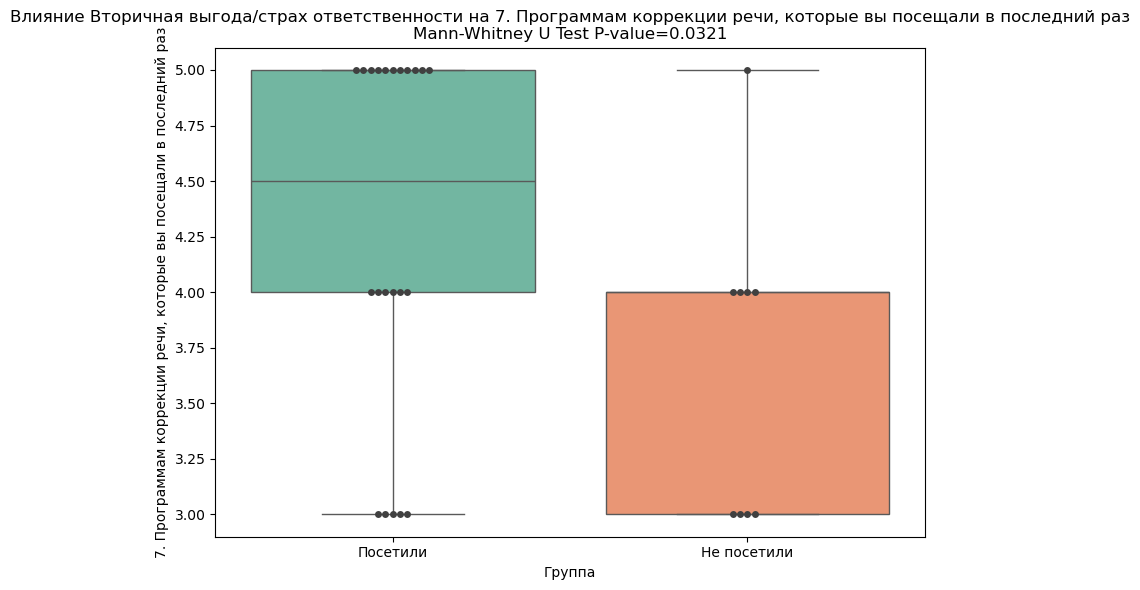

------------------------------
  Mann-Whitney U Test: Statistic=142.0, P-value=0.02784025447302307
  Урок: Вторичная выгода/страх ответственности статистически значимо влияет на: 5. Когда я заикаюсь, я ничего не могу с этим поделать.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


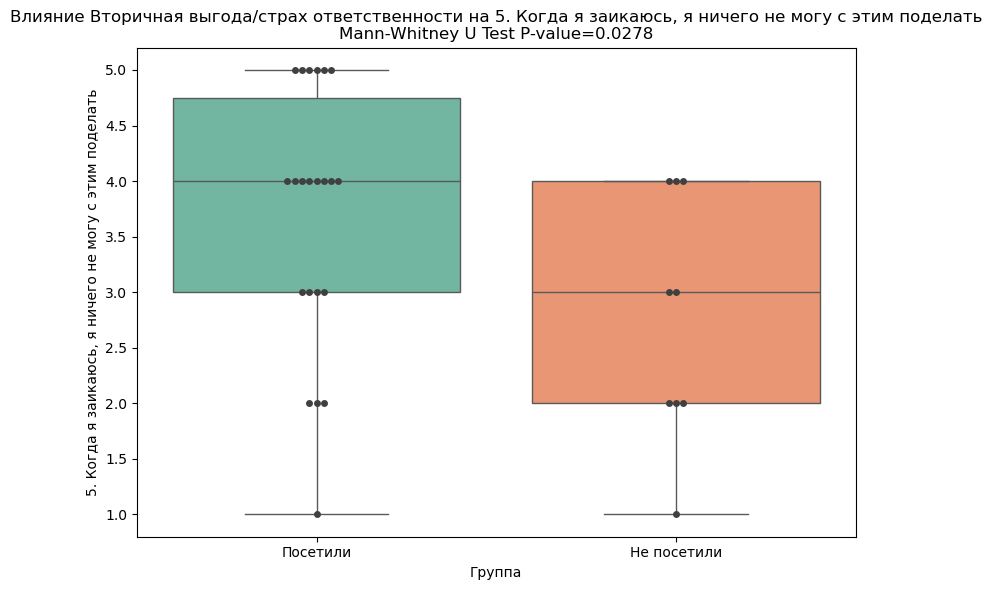

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


------------------------------
  Mann-Whitney U Test: Statistic=144.0, P-value=0.02319699557952436
  Урок: Вторичная выгода/страх ответственности статистически значимо влияет на: 8. Я не уверен в своих способностях как оратора.


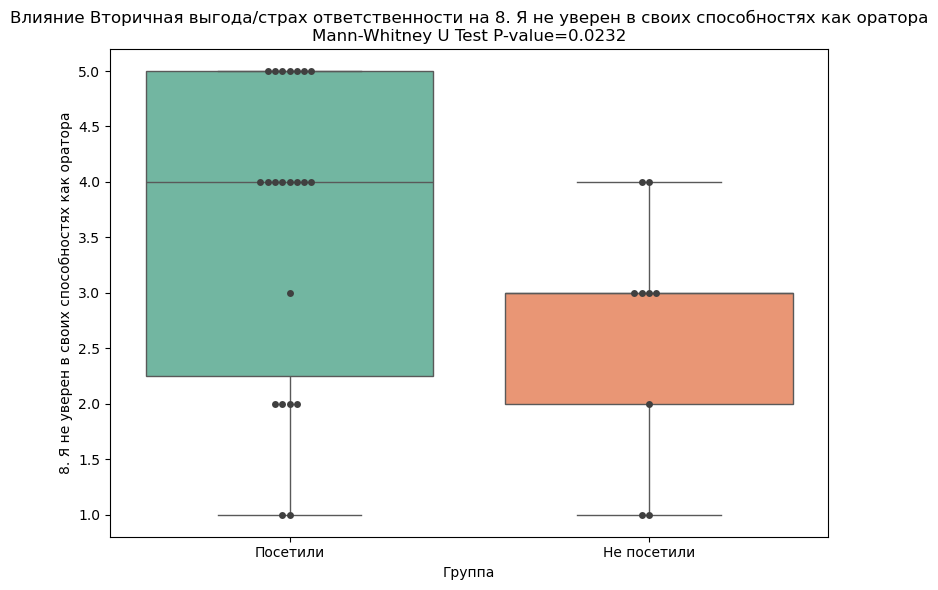

------------------------------
  Mann-Whitney U Test: Statistic=149.5, P-value=0.040509098883510744
  Урок: Разделение с маминым страхом/задачей статистически значимо влияет на: 2. Факторах, влияющих на заикание.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


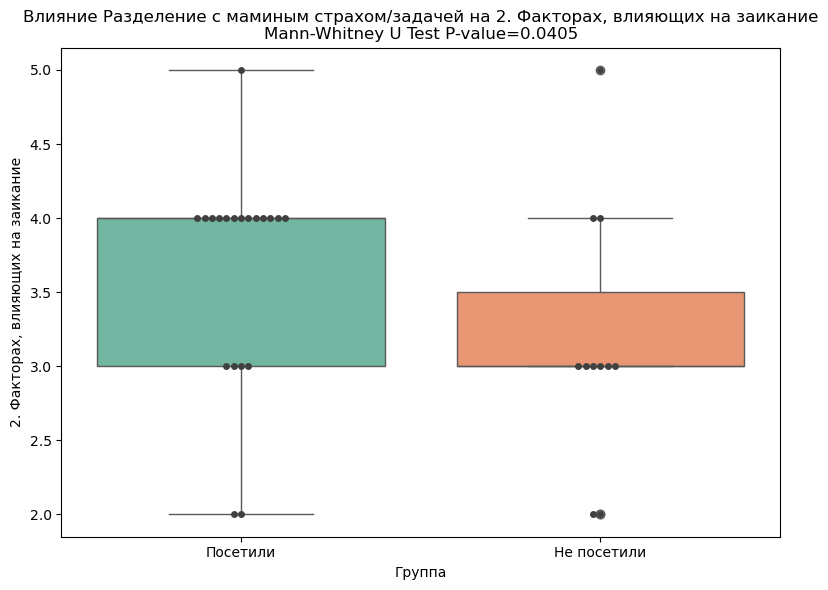

------------------------------
  Mann-Whitney U Test: Statistic=123.0, P-value=0.020144221436627058
  Урок: Границы, не быть удобным статистически значимо влияет на: 1. Заикании в целом.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


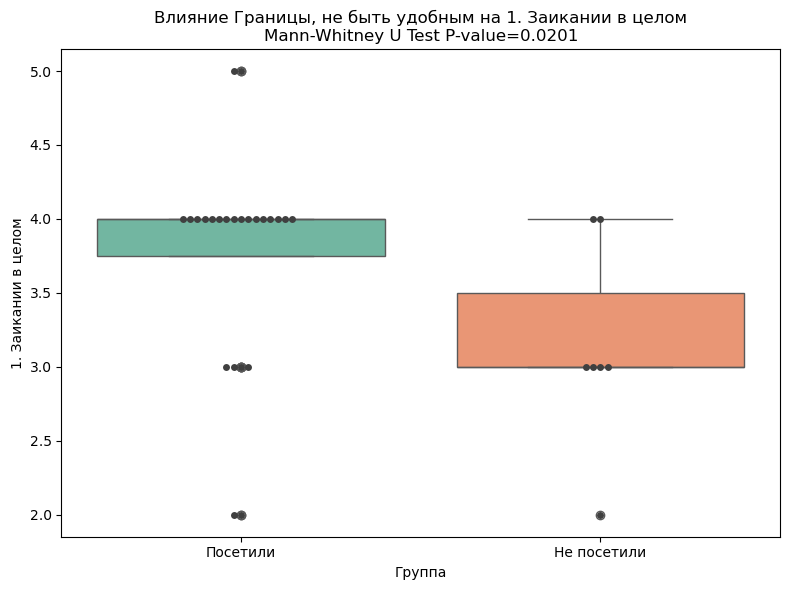

------------------------------
  Mann-Whitney U Test: Statistic=121.0, P-value=0.02842921533418055
  Урок: Границы, не быть удобным статистически значимо влияет на: 3. Том, что происходит с вашей речью, когда вы заикаетесь.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


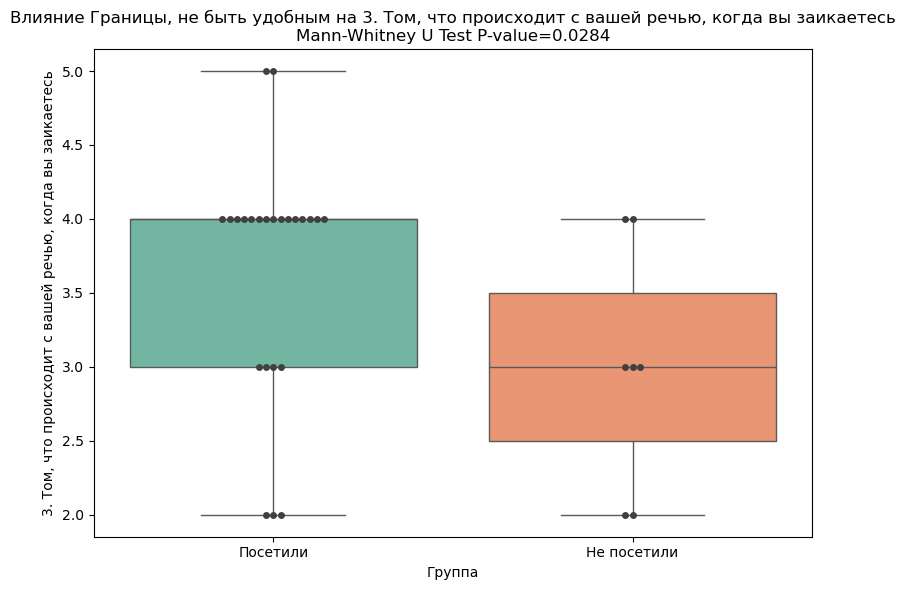

------------------------------
  Mann-Whitney U Test: Statistic=134.5, P-value=0.006659309037587837
  Урок: Границы, не быть удобным статистически значимо влияет на: 1. Вашим речевым способностям.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


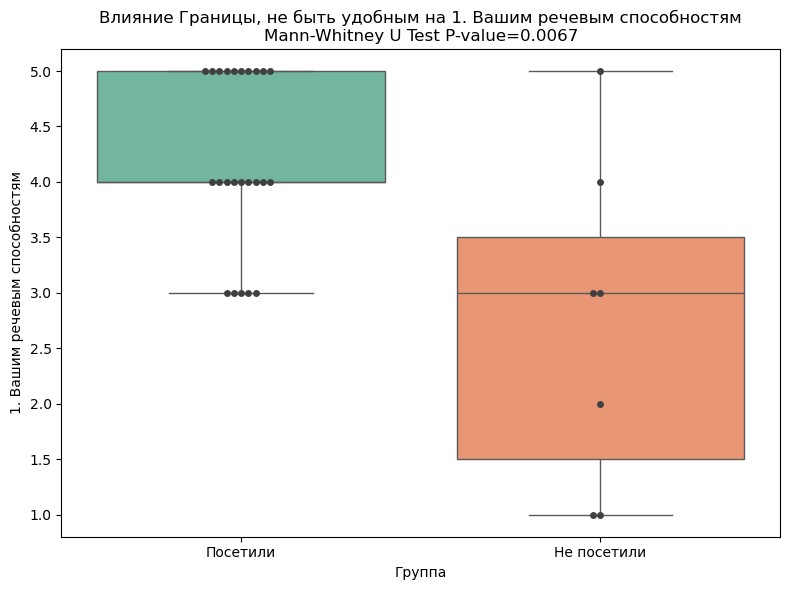

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


------------------------------
  Mann-Whitney U Test: Statistic=137.0, P-value=0.004555604222035362
  Урок: Границы, не быть удобным статистически значимо влияет на: 2. Вашей способности общаться (т.е. доносить свое сообщение до слушателей независимо от плавности речи).


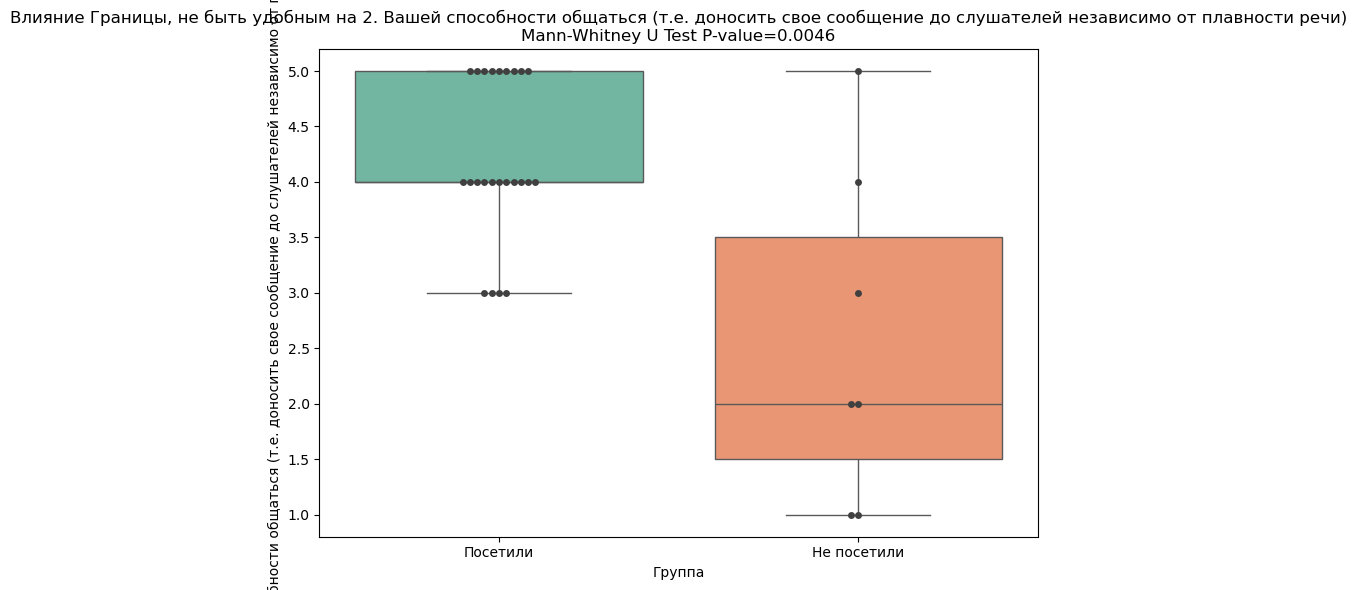

------------------------------
  Mann-Whitney U Test: Statistic=124.5, P-value=0.02540620794119034
  Урок: Границы, не быть удобным статистически значимо влияет на: 3. Тому как Вы звучите, когда говорите.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


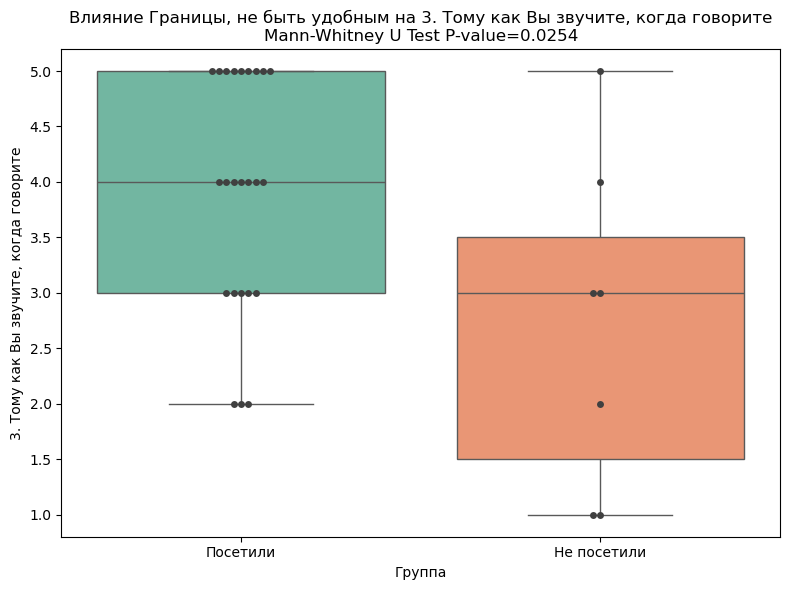

------------------------------
  Mann-Whitney U Test: Statistic=120.0, P-value=0.03590705753802332
  Урок: Границы, не быть удобным статистически значимо влияет на: 4. Методам беглой речи.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


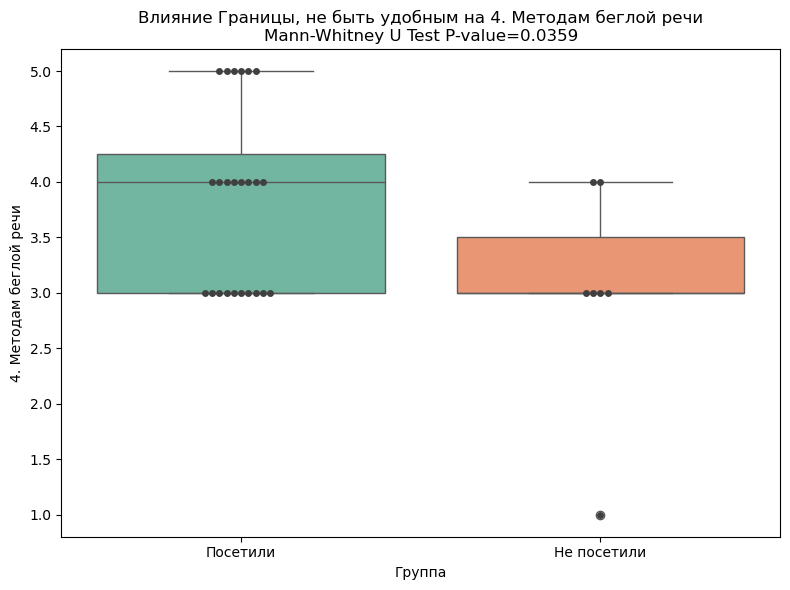

------------------------------
  Mann-Whitney U Test: Statistic=142.5, P-value=0.0021449127027785946
  Урок: Границы, не быть удобным статистически значимо влияет на: 6. Тому, чтобы быть человеком, который заикается.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


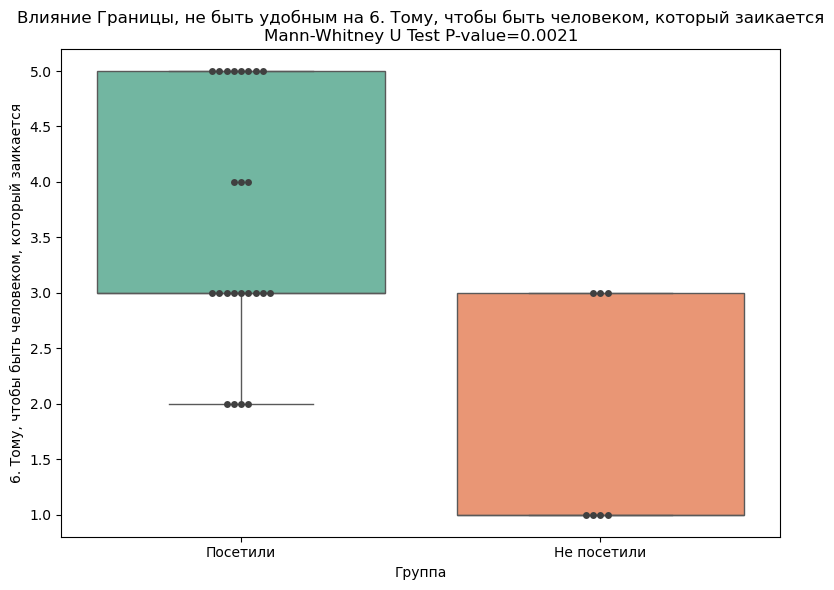

------------------------------
  Mann-Whitney U Test: Statistic=141.5, P-value=0.002752053965275169
  Урок: Границы, не быть удобным статистически значимо влияет на: 8. Тому, чтобы быть идентифицированным другими людьми как заика/человек, который заикается.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


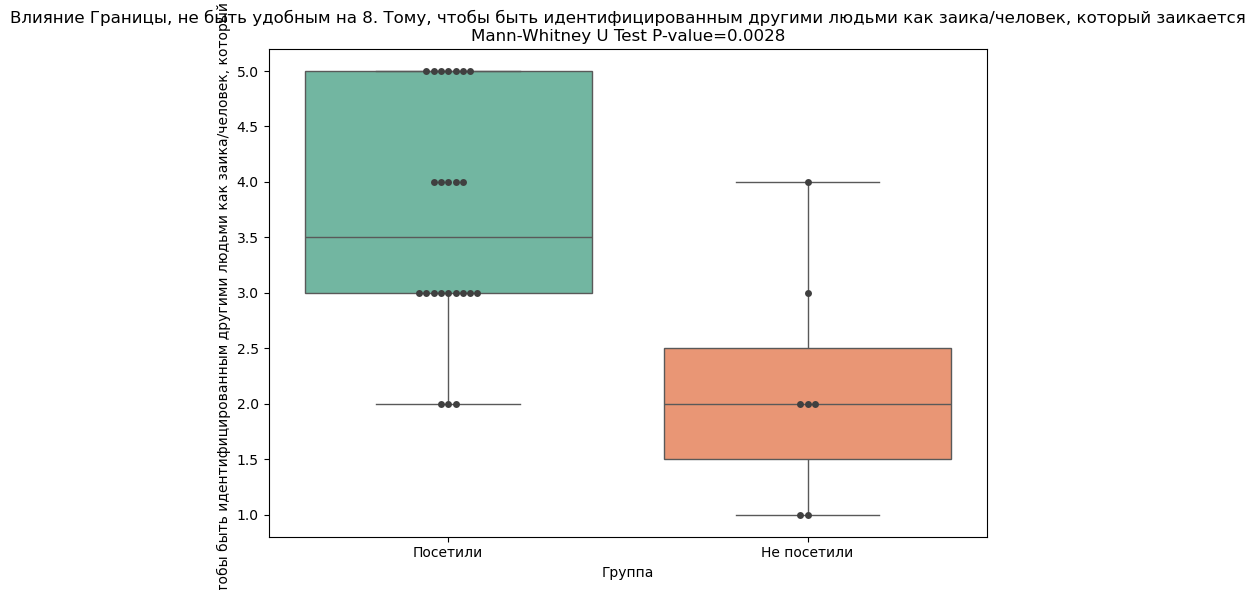

------------------------------
  Mann-Whitney U Test: Statistic=124.0, P-value=0.024850038096170573
  Урок: Границы, не быть удобным статистически значимо влияет на: 1. Беспомощный.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


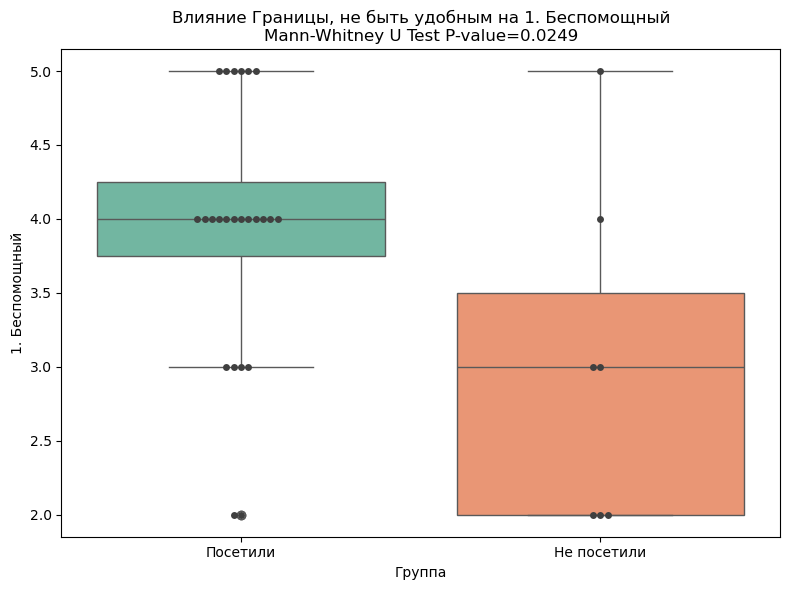

------------------------------
  Mann-Whitney U Test: Statistic=127.0, P-value=0.01806187394521368
  Урок: Границы, не быть удобным статистически значимо влияет на: 2. Злой.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


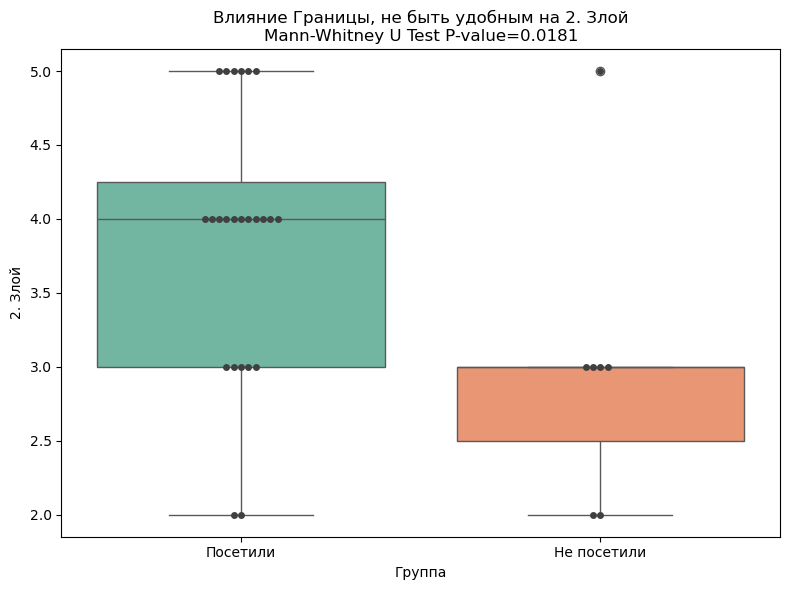

------------------------------
  Mann-Whitney U Test: Statistic=133.0, P-value=0.007319330709360868
  Урок: Границы, не быть удобным статистически значимо влияет на: 3. Стыдящийся.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


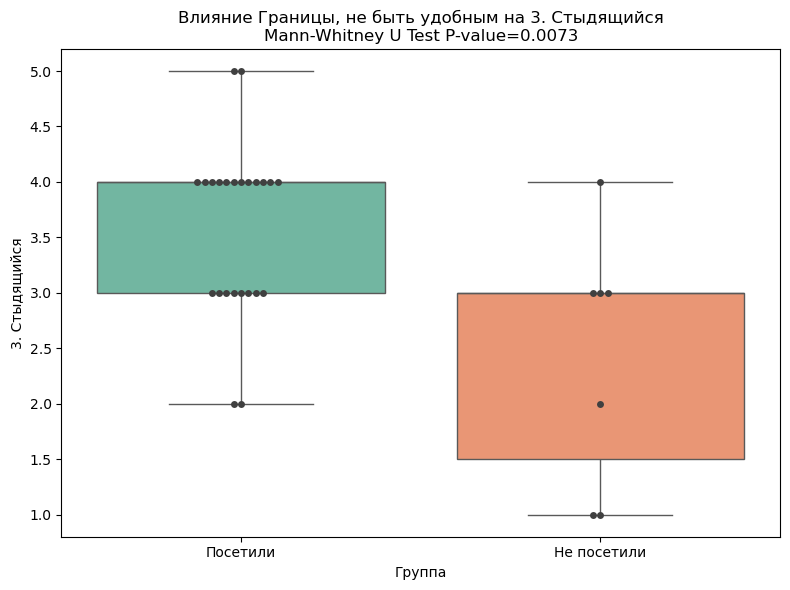

------------------------------
  Mann-Whitney U Test: Statistic=117.0, P-value=0.04402336419639504
  Урок: Границы, не быть удобным статистически значимо влияет на: 4. Одинокий.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


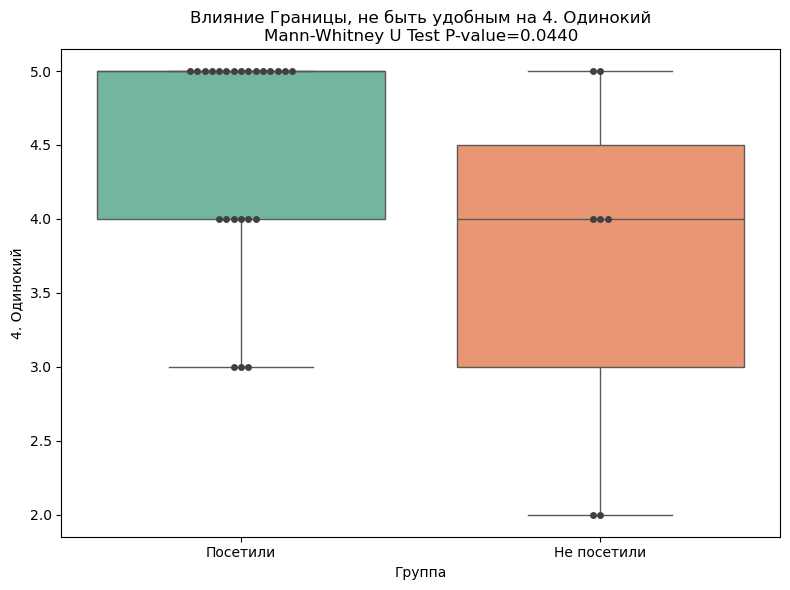

------------------------------
  Mann-Whitney U Test: Statistic=123.5, P-value=0.027587689347411633
  Урок: Границы, не быть удобным статистически значимо влияет на: 6. Подавленный.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


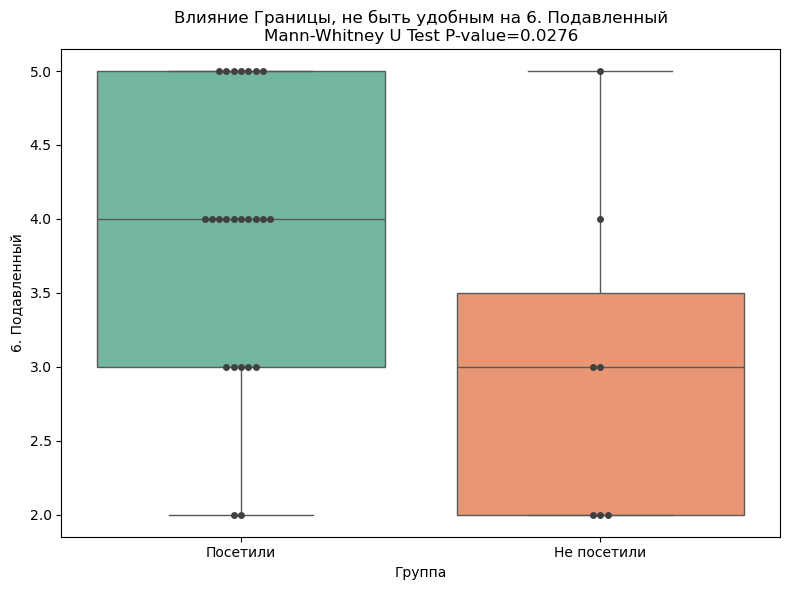

------------------------------
  Mann-Whitney U Test: Statistic=127.0, P-value=0.018832294698198013
  Урок: Границы, не быть удобным статистически значимо влияет на: 8. Расстроенный.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


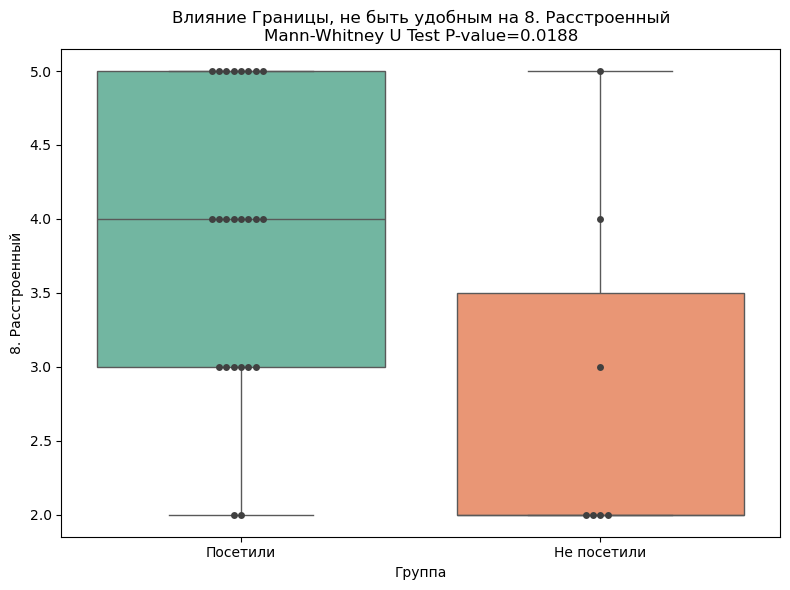

------------------------------
  Mann-Whitney U Test: Statistic=125.0, P-value=0.023346626221762652
  Урок: Границы, не быть удобным статистически значимо влияет на: 2. Мнение людей обо мне в первую очередь основано на том, как я говорю.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


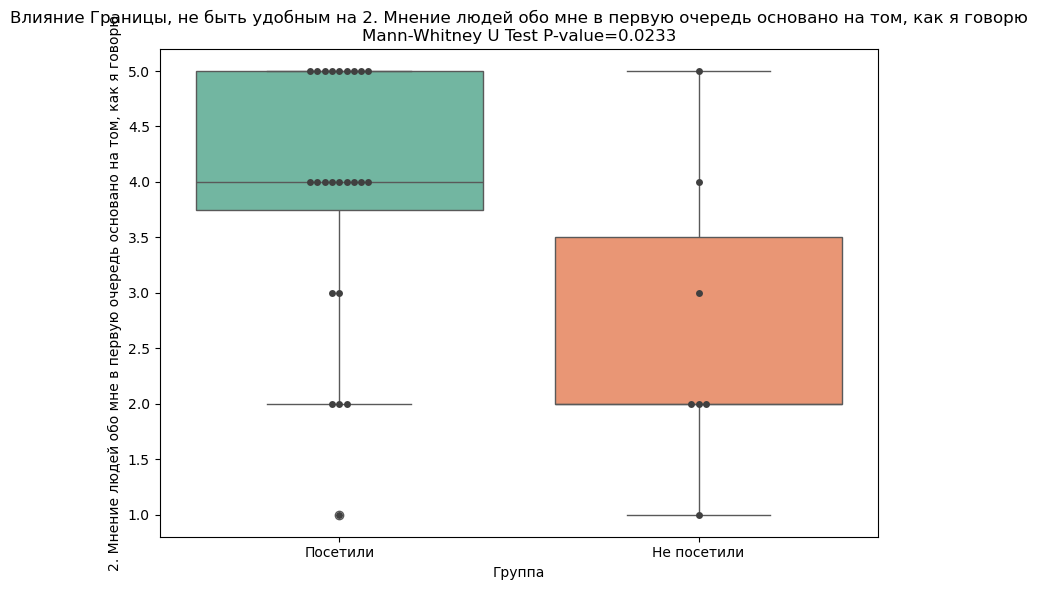

------------------------------
  Mann-Whitney U Test: Statistic=139.5, P-value=0.0024479290827613166
  Урок: Границы, не быть удобным статистически значимо влияет на: 4. Я не хочу, чтобы люди знали, что я заикаюсь.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


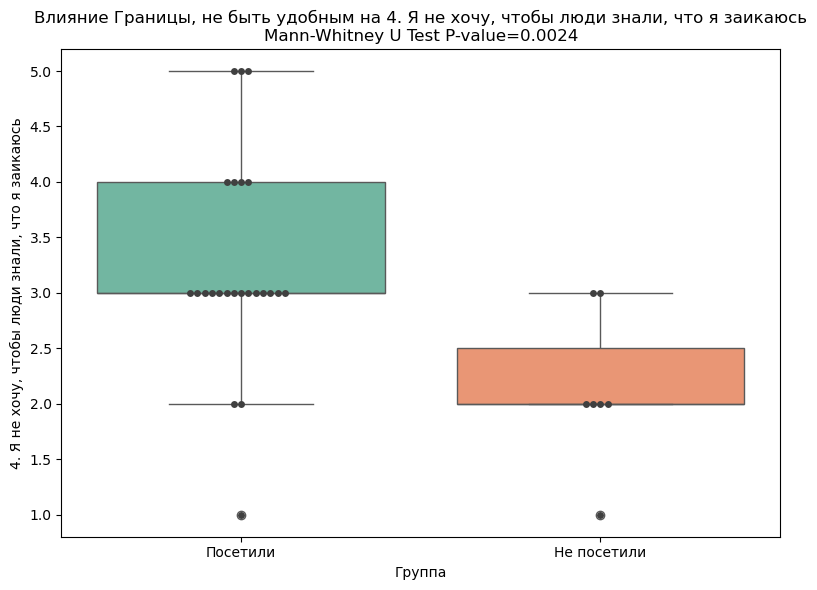

------------------------------
  Mann-Whitney U Test: Statistic=126.0, P-value=0.02187104959360318
  Урок: Границы, не быть удобным статистически значимо влияет на: 8. Я не уверен в своих способностях как оратора.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


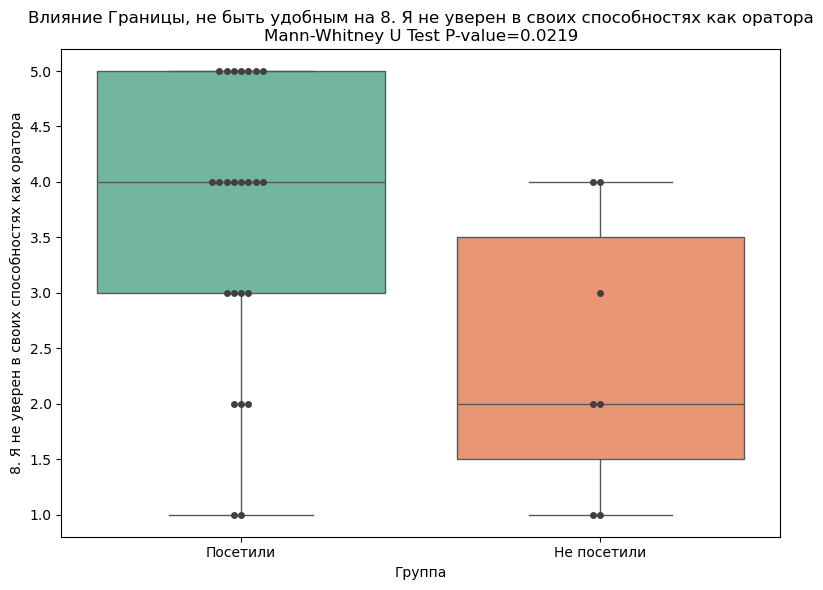

------------------------------
  Mann-Whitney U Test: Statistic=127.0, P-value=0.017512577348083324
  Урок: Границы, не быть удобным статистически значимо влияет на: 1. Испытываете физическое напряжение при заикании.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


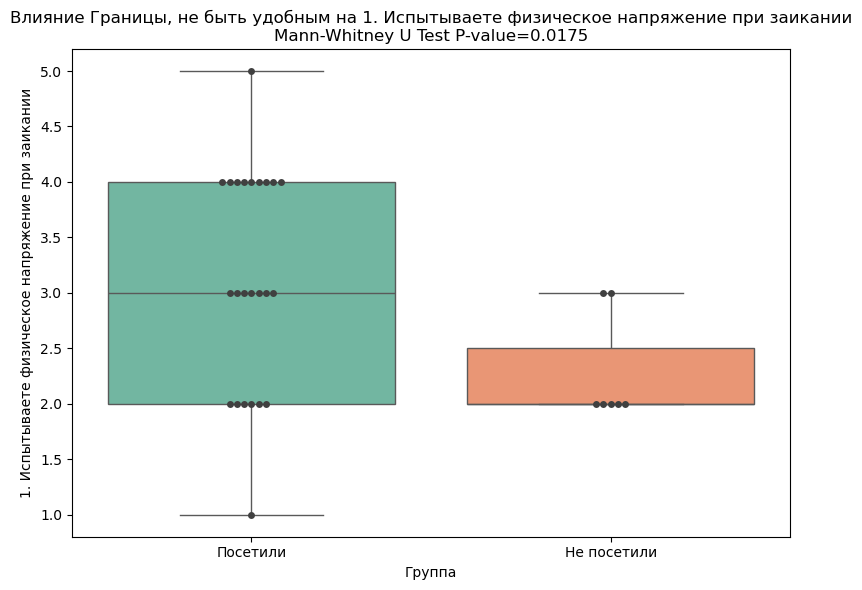

------------------------------
  Mann-Whitney U Test: Statistic=150.5, P-value=0.00047223494935863785
  Урок: Границы, не быть удобным статистически значимо влияет на: 2. Испытываете физическое напряжение при беглой речи.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


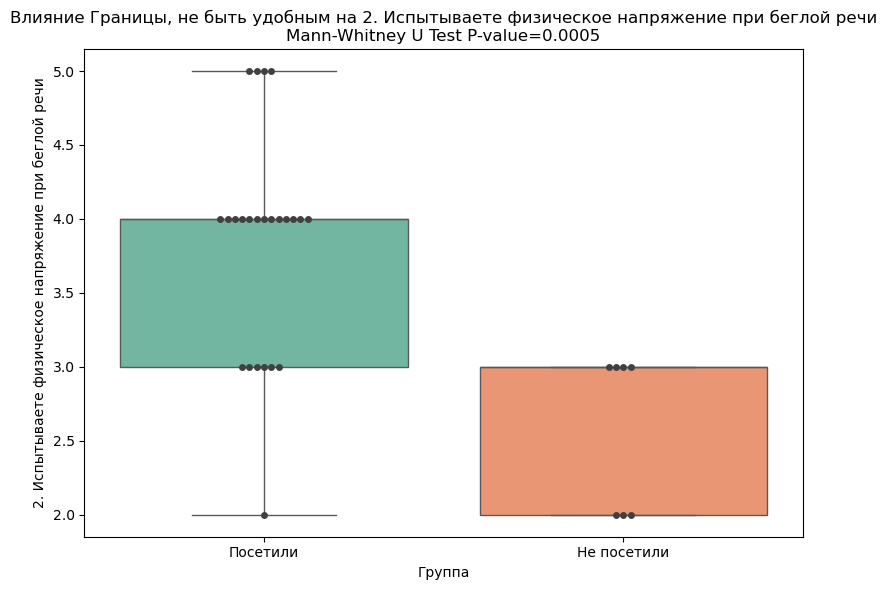

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


------------------------------
  Mann-Whitney U Test: Statistic=120.0, P-value=0.04075508186913706
  Урок: Границы, не быть удобным статистически значимо влияет на: 4. Прерываете зрительный контакт или избегаете смотреть на своего слушателя.


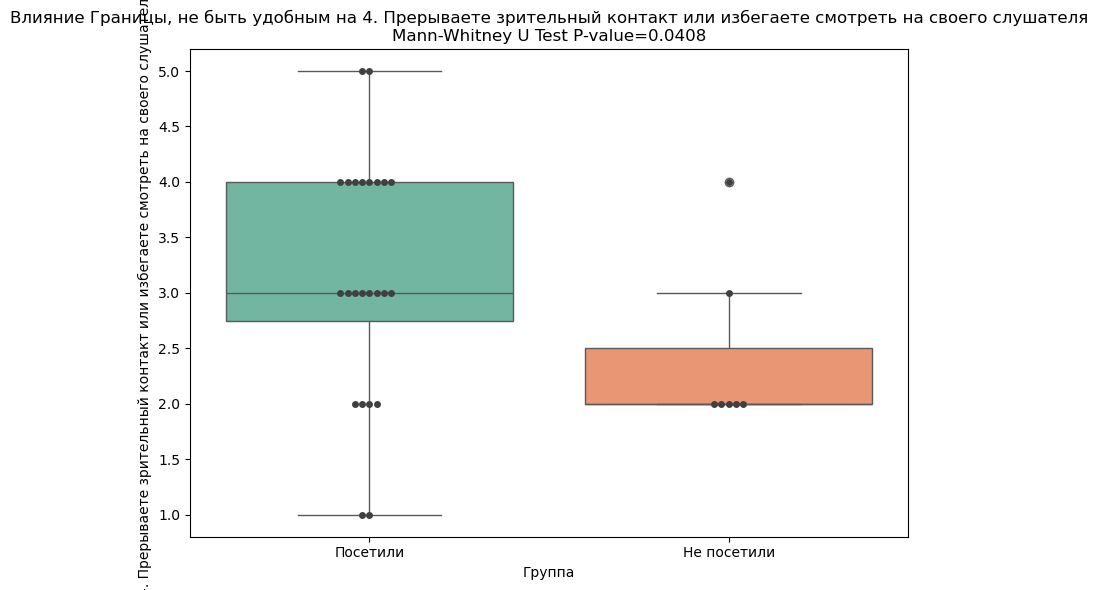

------------------------------
  Mann-Whitney U Test: Statistic=123.0, P-value=0.02437165171740936
  Урок: Границы, не быть удобным статистически значимо влияет на: 7. Испытываете период усиленного заикания сразу после того, как вы запнулись на слове.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


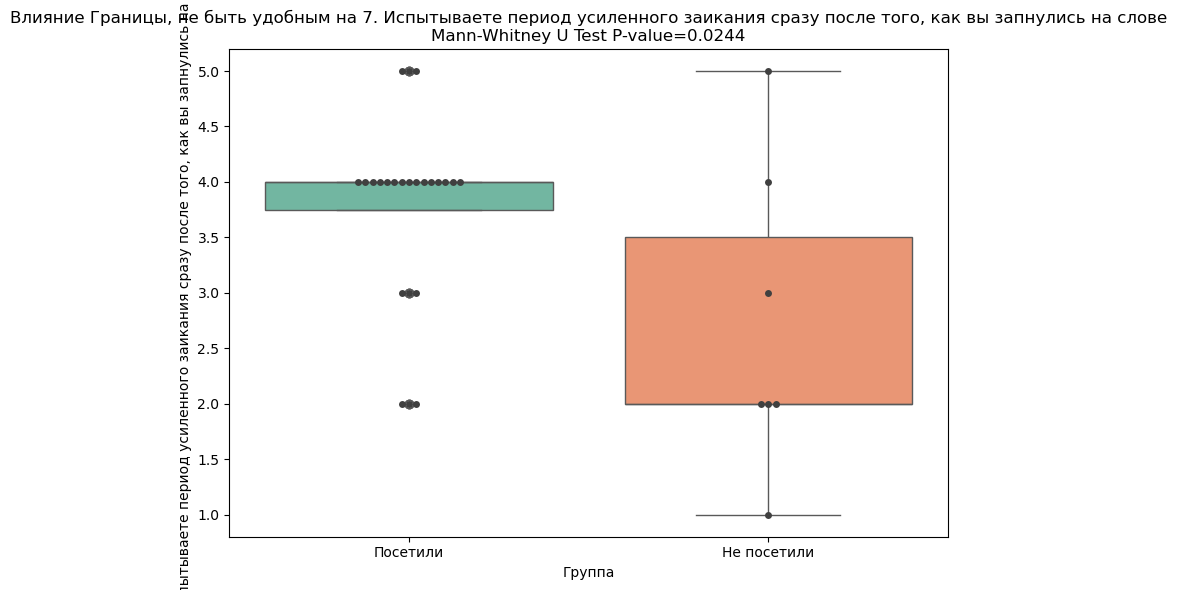

------------------------------
  Mann-Whitney U Test: Statistic=127.0, P-value=0.018369016798635434
  Урок: Границы, не быть удобным статистически значимо влияет на: 3. Выступление перед небольшой группой людей.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


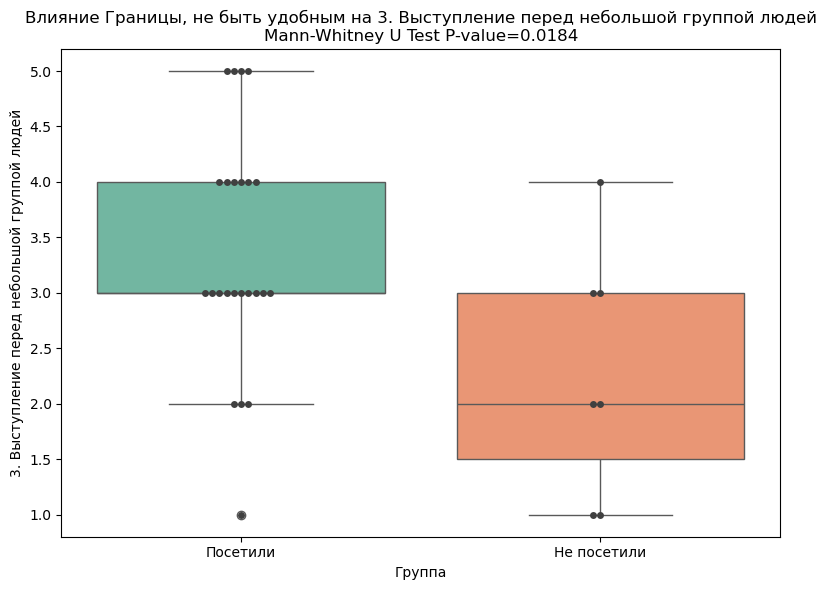

------------------------------
  Mann-Whitney U Test: Statistic=124.5, P-value=0.024574115439783793
  Урок: Границы, не быть удобным статистически значимо влияет на: 4. Выступать перед большой группой людей.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


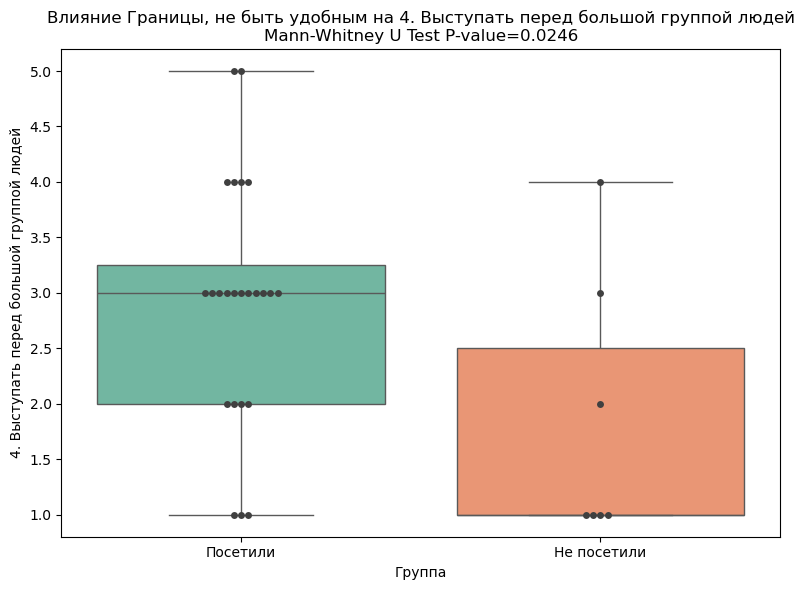

------------------------------
  Mann-Whitney U Test: Statistic=81.5, P-value=0.04235064584943472
  Урок: Непринятие себя статистически значимо влияет на: 2. Факторах, влияющих на заикание.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


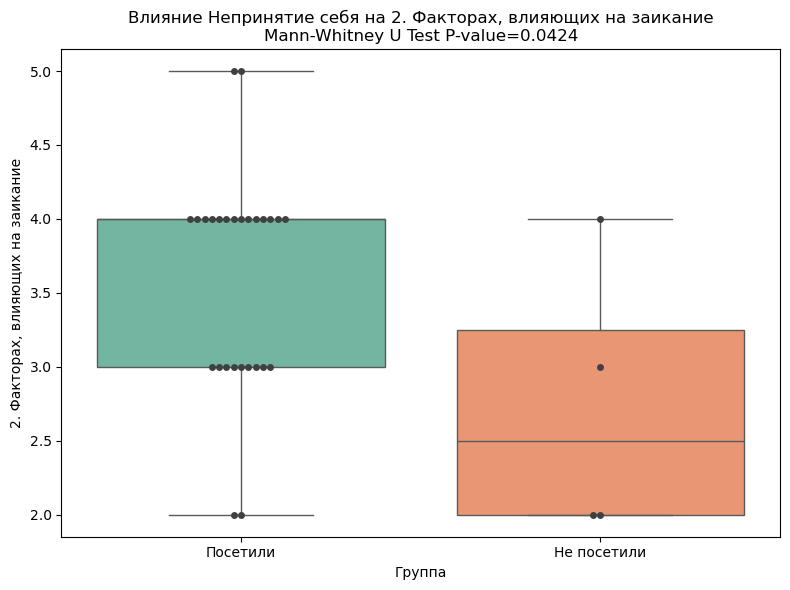

------------------------------
  Mann-Whitney U Test: Statistic=82.0, P-value=0.03676434628849431
  Урок: Непринятие себя статистически значимо влияет на: 3. Том, что происходит с вашей речью, когда вы заикаетесь.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


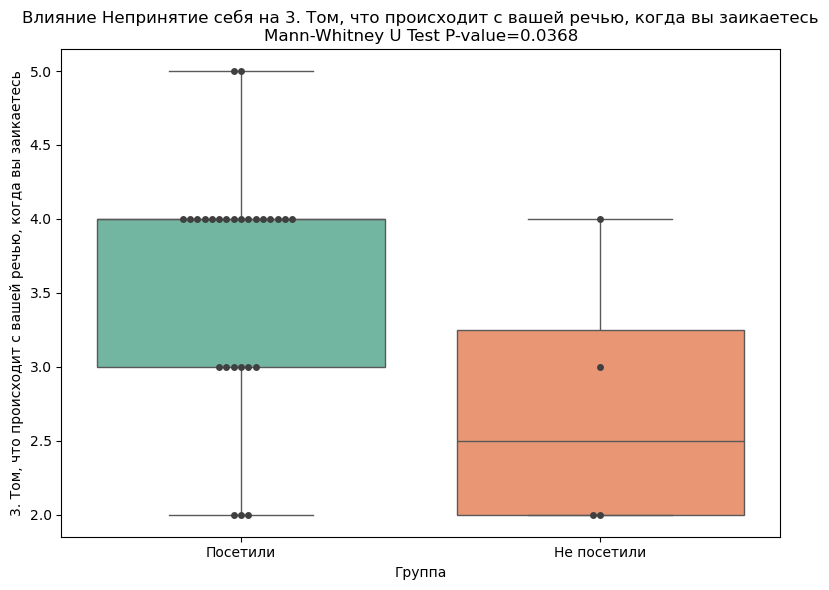

------------------------------
  Mann-Whitney U Test: Statistic=169.5, P-value=0.022542148936651227
  Урок: Взросление статистически значимо влияет на: 5. Когда я заикаюсь, я ничего не могу с этим поделать.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


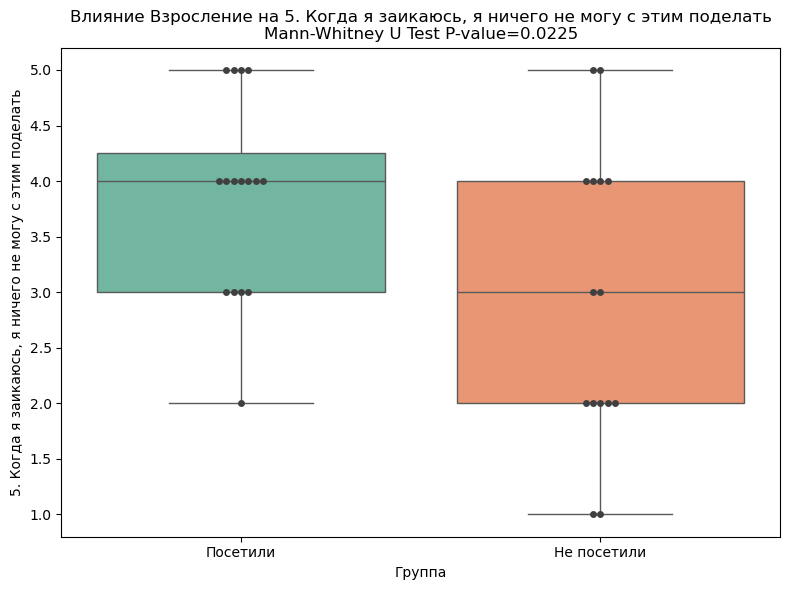

------------------------------
  Mann-Whitney U Test: Statistic=108.0, P-value=0.04389490127067648
  Урок: Я не спас маму/близкого статистически значимо влияет на: 4. Вариантах лечения для людей, которые заикаются.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


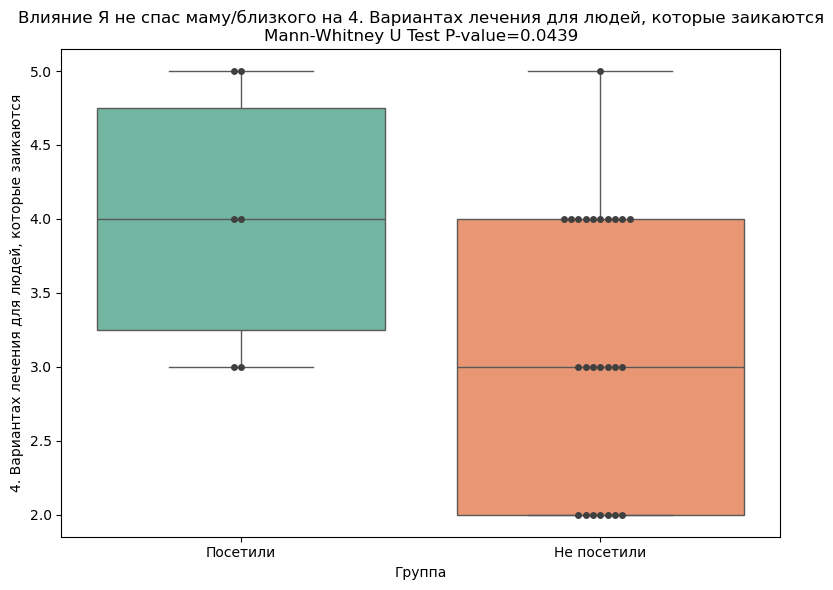

------------------------------
  Mann-Whitney U Test: Statistic=136.0, P-value=0.004768229304244898
  Урок: Насилие физическое статистически значимо влияет на: 3. Как часто вы используете приемы, которым научились на занятиях по логопедии?.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


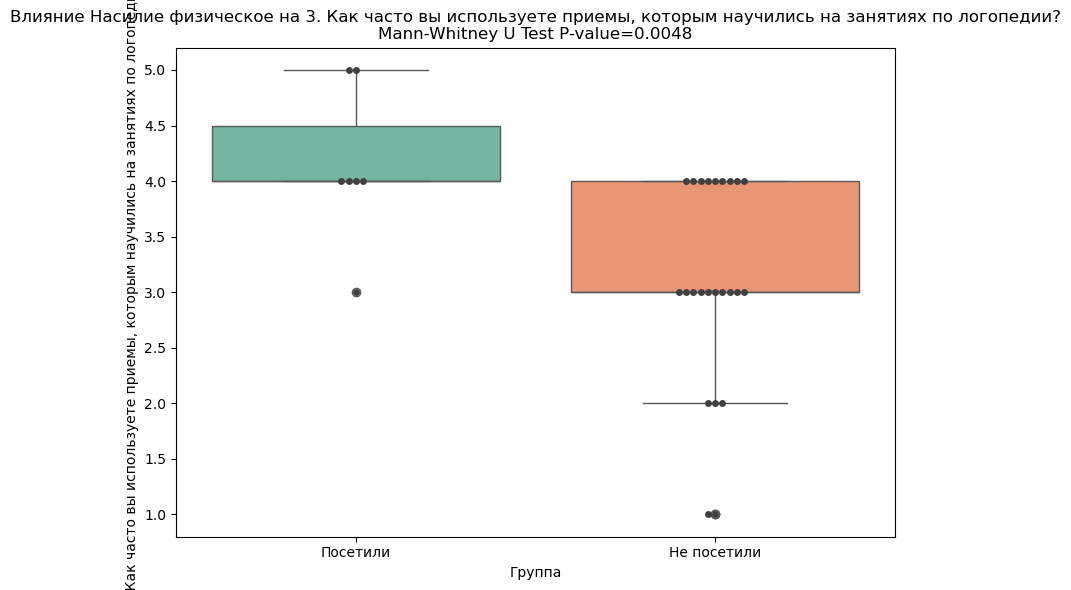

------------------------------
  Mann-Whitney U Test: Statistic=134.0, P-value=0.0070067517682796225
  Урок: Насилие физическое статистически значимо влияет на: 4. Вариантах лечения для людей, которые заикаются.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


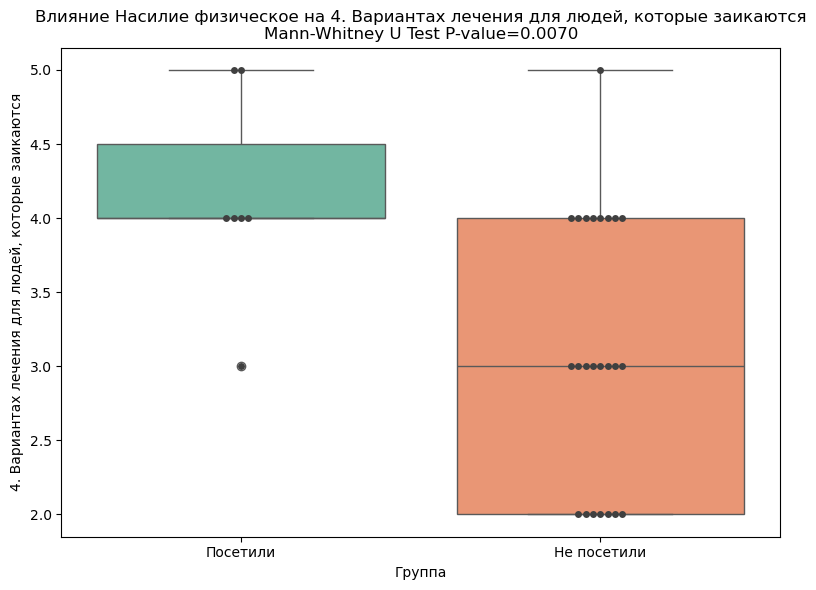

------------------------------
  Mann-Whitney U Test: Statistic=121.0, P-value=0.035112400936977615
  Урок: Насилие физическое статистически значимо влияет на: 1. Испытываете физическое напряжение при заикании.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


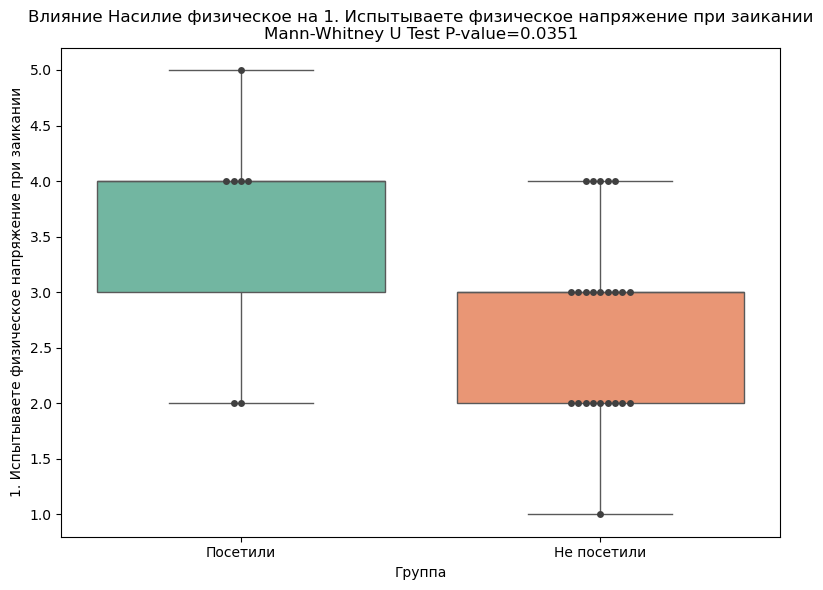

------------------------------
  Mann-Whitney U Test: Statistic=119.5, P-value=0.042709337271625104
  Урок: Насилие физическое статистически значимо влияет на: 3. Выступление перед небольшой группой людей.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


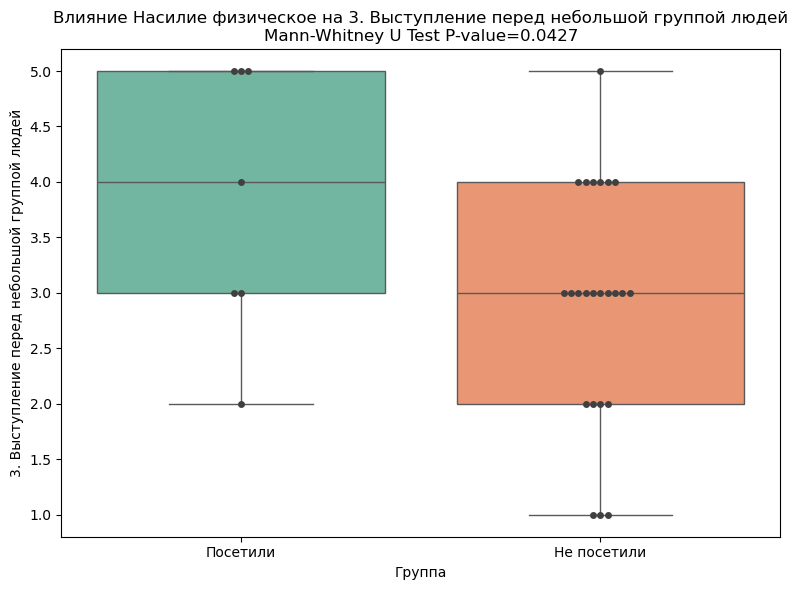

------------------------------
  Mann-Whitney U Test: Statistic=128.0, P-value=0.01619992139930586
  Урок: Насилие физическое статистически значимо влияет на: 4. Выступать перед большой группой людей.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


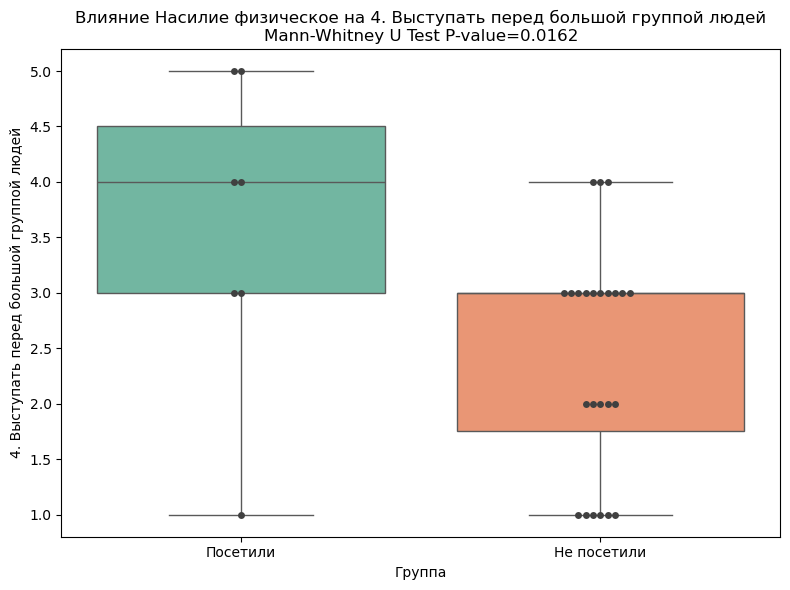

------------------------------
  Mann-Whitney U Test: Statistic=165.5, P-value=0.022556186631592777
  Урок: Насилие моральное статистически значимо влияет на: 8. Позволяете кому-то сказать за Вас.


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


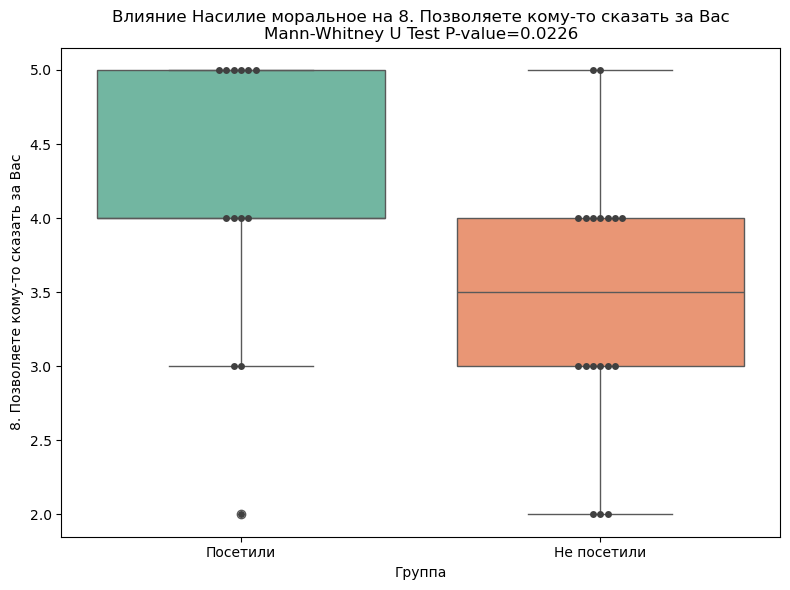

------------------------------
  Mann-Whitney U Test: Statistic=172.0, P-value=0.00921283538906516
  Урок: Насилие моральное статистически значимо влияет на: 6. Разговаривать с людьми, которых Вы не очень хорошо знаете (например, прохожие).


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


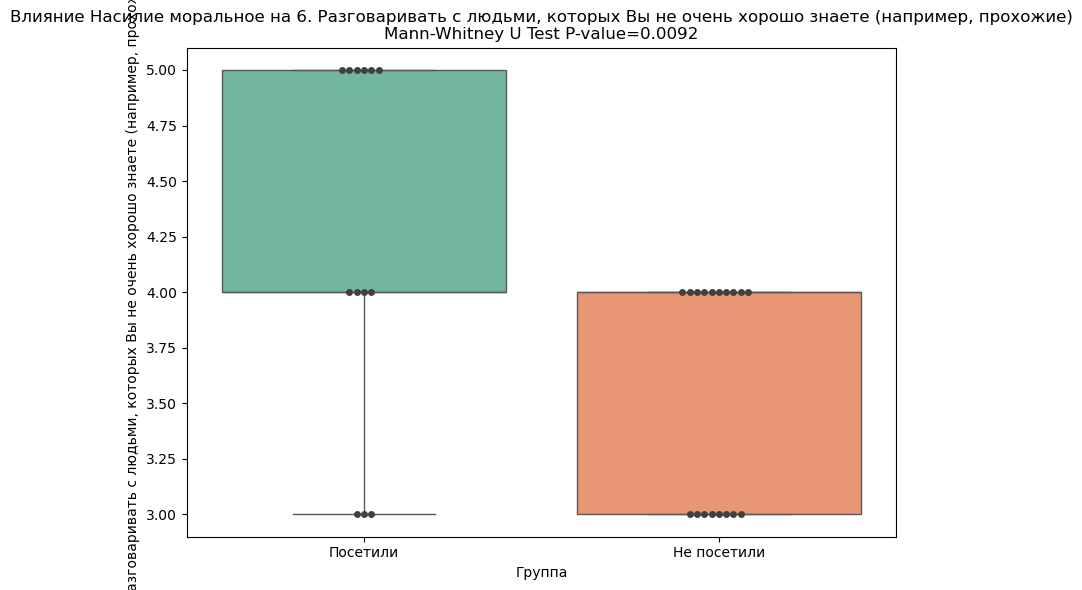

------------------------------
  Mann-Whitney U Test: Statistic=170.5, P-value=0.013539511386740331
  Урок: Насилие моральное статистически значимо влияет на: 8. Постоять за себя устно (отстаивая свое мнение, бросая вызов тому, кто пролезает вперед в очередь).


C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\328215771.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")


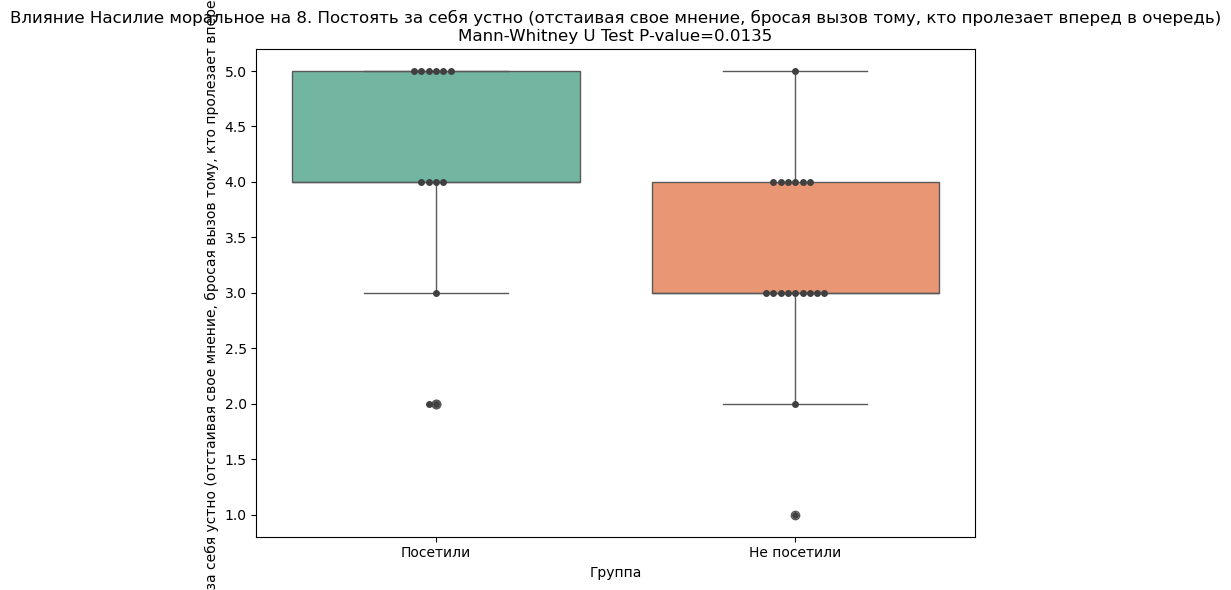

------------------------------


In [37]:
# Анализ влияния уроков на улучшения
for lesson in lesson_columns:
    for col in improved_columns:
        # Разделяем данные на группы
        attended = data_b_filtered_merged[data_b_filtered_merged[lesson] == 1][col]
        not_attended = data_b_filtered_merged[data_b_filtered_merged[lesson] == 0][col]

        # Mann-Whitney U Test
        stat, p_value = mannwhitneyu(attended, not_attended, alternative='greater')


        if p_value < 0.05:
            print(f"  Mann-Whitney U Test: Statistic={stat}, P-value={p_value}")
            print(f"  Урок: {lesson} статистически значимо влияет на: {col}.")
            
            # Создание DataFrame для визуализации
            df_plot = pd.DataFrame({
                'Группа': ['Посетили'] * len(attended) + ['Не посетили'] * len(not_attended),
                'Метрика': list(attended) + list(not_attended)
            })

            # Построение коробчатой диаграммы
            plt.figure(figsize=(8, 6))
            sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")
            sns.swarmplot(x='Группа', y='Метрика', data=df_plot, color=".25")

            # Добавление заголовка и подписей
            plt.title(f"Влияние {lesson} на {col}\nMann-Whitney U Test P-value={p_value:.4f}")
            plt.xlabel('Группа')
            plt.ylabel(col)

            # Отображение графика
            plt.tight_layout()
            plt.show()
            
            print("-" * 30)

In [38]:
# Приведение данных "Точки Б"
# Значения типа 5(1) или 5 (1) приводим к 5
data_b = data_b.replace(to_replace=r'^\s*(\d+)\s*\(?\d*\)?\s*$', value=r'\1', regex=True)

# Определяем 9 колонок для анализа
required_columns = [
    'Степень выраженности заикания: от 1-10',
    'Спонтанная речь',
    'Чтение',
    'Пересказ',
    'Вопрос-ответ (диалог)',
    'Сопряженная речь',
    'Отраженная речь',
    'Стихотворная',
    'Шепотная'
]

# Рассчитываем разности
differences = {}
for col in required_columns:
    # Преобразуем данные к числовому формату и вычисляем разности
    data_a_col = pd.to_numeric(data_a[col], errors='coerce')
    data_b_col = pd.to_numeric(data_b[col], errors='coerce')
    differences[col] = data_b_col - data_a_col

# Преобразуем в DataFrame
differences_df = pd.DataFrame(differences)

# Убираем строки с нулевыми разностями и пропущенными значениями
filtered_differences_df = differences_df[(differences_df != 0).any(axis=1)].dropna()

# Тест Вилкоксона для каждой колонки
print("\nТест Вилкоксона для 9 колонок:")
for col in required_columns:
    valid_indices = filtered_differences_df[col].dropna().index  # Индексы без пропущенных значений
    valid_differences = filtered_differences_df[col].loc[valid_indices]  # Разности без NaN

    # Выполняем тест Вилкоксона
    stat, p_value = wilcoxon(valid_differences, alternative='greater')  # Односторонний тест
    if p_value > 0.05:
        print(f"{col}: НЕ НАЙДЕНЫ изменения")
        print(f"  Wilcoxon Test: Statistic={stat}, P-value={p_value}\n")
    else:
        print(f"{col}: Найдены изменения")
        print(f"  Wilcoxon Test: Statistic={stat}, P-value={p_value}\n")





Тест Вилкоксона для 9 колонок:
Степень выраженности заикания: от 1-10: Найдены изменения
  Wilcoxon Test: Statistic=92.0, P-value=0.0037333700671938735

Спонтанная речь: Найдены изменения
  Wilcoxon Test: Statistic=73.5, P-value=0.0024778661586389522

Чтение: Найдены изменения
  Wilcoxon Test: Statistic=60.5, P-value=0.003763157583228937

Пересказ: Найдены изменения
  Wilcoxon Test: Statistic=66.0, P-value=0.0006703205586147392

Вопрос-ответ (диалог): Найдены изменения
  Wilcoxon Test: Statistic=60.0, P-value=0.03535057243299149

Сопряженная речь: НЕ НАЙДЕНЫ изменения
  Wilcoxon Test: Statistic=21.0, P-value=0.1029516053660342

Отраженная речь: НЕ НАЙДЕНЫ изменения
  Wilcoxon Test: Statistic=28.0, P-value=0.06583400801140711

Стихотворная: НЕ НАЙДЕНЫ изменения
  Wilcoxon Test: Statistic=14.0, P-value=0.20710808912126266

Шепотная: НЕ НАЙДЕНЫ изменения
  Wilcoxon Test: Statistic=2.5, P-value=0.9213503964748574



Выше
был проведен тест Вилкоксона для 9 добавленных позже колонок, основные результаты:
Улучшение по всем ключевым метрикам.
Для пяти из девяти метрик (Степень выраженности заикания, Спонтанная речь, Чтение, Пересказ, Вопрос-ответ) выявлены значительные улучшения с высоким уровнем статистической значимости (p-value < 0.05).

Наиболее заметные изменения:

Пересказ (p-value = 0.0007):
Самые сильные улучшения зафиксированы в навыках пересказа текста.
Спонтанная речь (p-value = 0.0025):
Участники показали уверенный прогресс в свободном говорении.
Наименьшая значимость:
Метрика "Вопрос-ответ (диалог)" имеет самый высокий p-value среди значимых результатов (0.0354), что указывает на умеренное, но всё же важное улучшение.

In [39]:
merged_data_full = pd.merge(differences_df, attendance, left_index=True, right_index=True)
merged_data_full.dropna(inplace=True)


Анализ влияния уроков на значимые метрики (только значимые результаты):
------------------------------
  Mann-Whitney U Test: Statistic=42.5, P-value=0.0427994998033266
  Урок: Злость, агрессия, не терпеть/защитить себя/уязвимость статистически значимо влияет на: Степень выраженности заикания: от 1-10.
------------------------------
  Mann-Whitney U Test: Statistic=43.0, P-value=0.03581878316434408
  Урок: Злость, агрессия, не терпеть/защитить себя/уязвимость статистически значимо влияет на: Спонтанная речь.
------------------------------
  Mann-Whitney U Test: Statistic=128.5, P-value=0.007964398532319152
  Урок: Тайна статистически значимо влияет на: Вопрос-ответ (диалог).
------------------------------
  Mann-Whitney U Test: Statistic=73.5, P-value=0.02206722380401796
  Урок: Непринятие себя статистически значимо влияет на: Степень выраженности заикания: от 1-10.
------------------------------
  Mann-Whitney U Test: Statistic=74.0, P-value=0.0184490744775703
  Урок: Непринятие себя

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\2293427466.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")  # Диаграмма


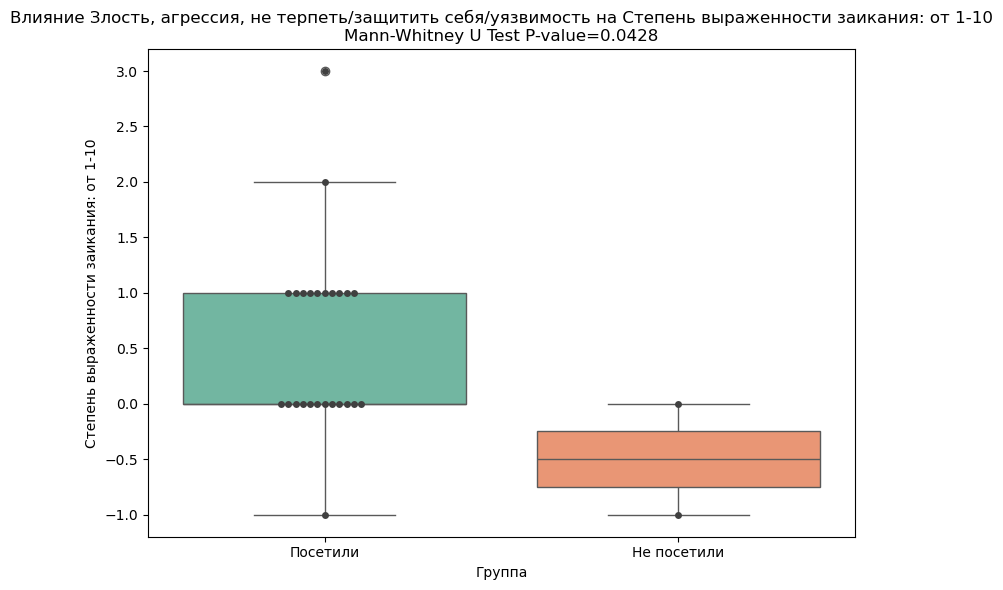

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\2293427466.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")  # Диаграмма


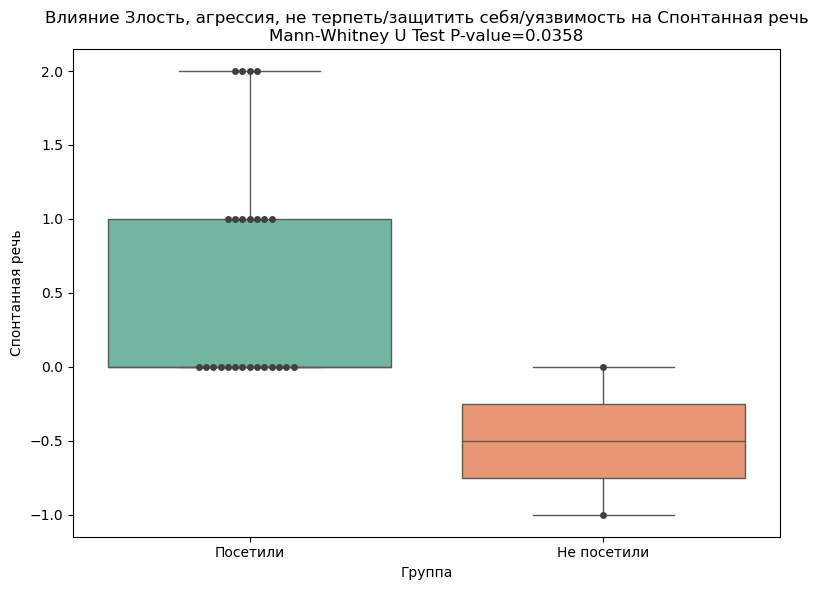

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\2293427466.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")  # Диаграмма


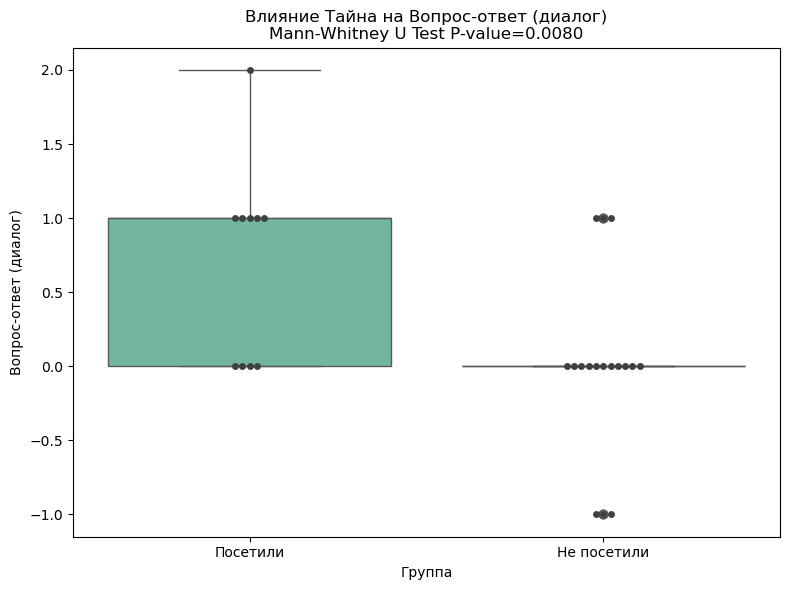

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\2293427466.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")  # Диаграмма


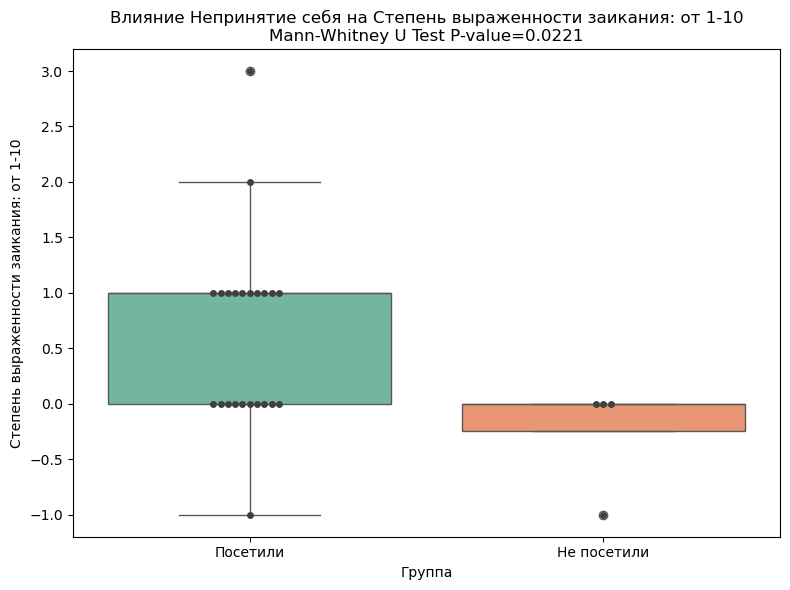

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\2293427466.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")  # Диаграмма


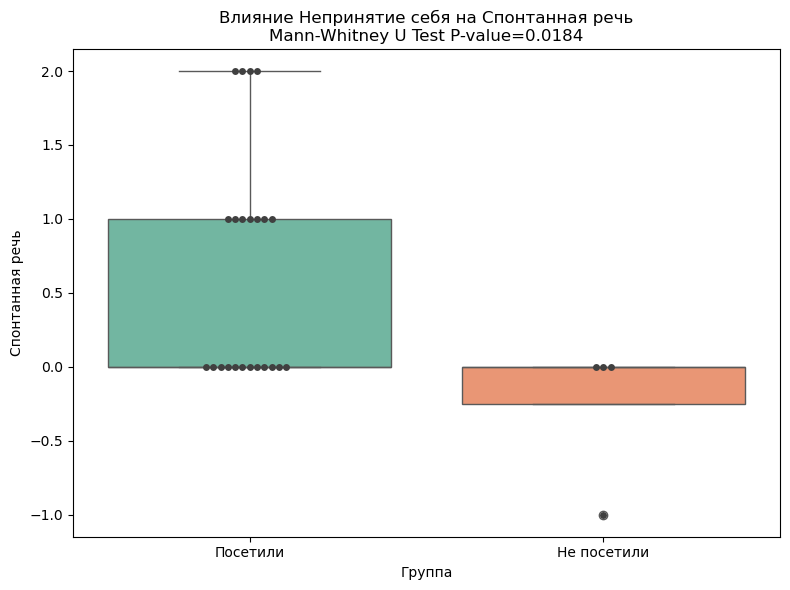

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\2293427466.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")  # Диаграмма


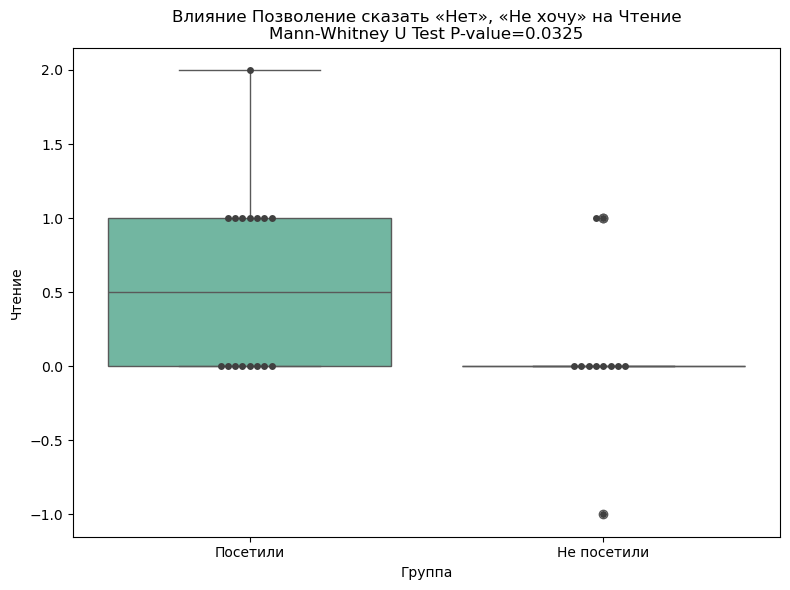

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\2293427466.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")  # Диаграмма


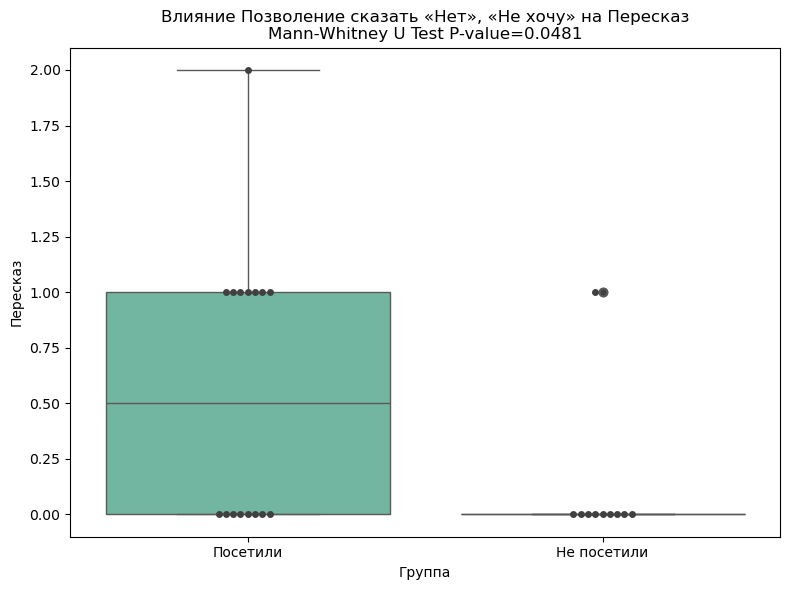

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\2293427466.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")  # Диаграмма


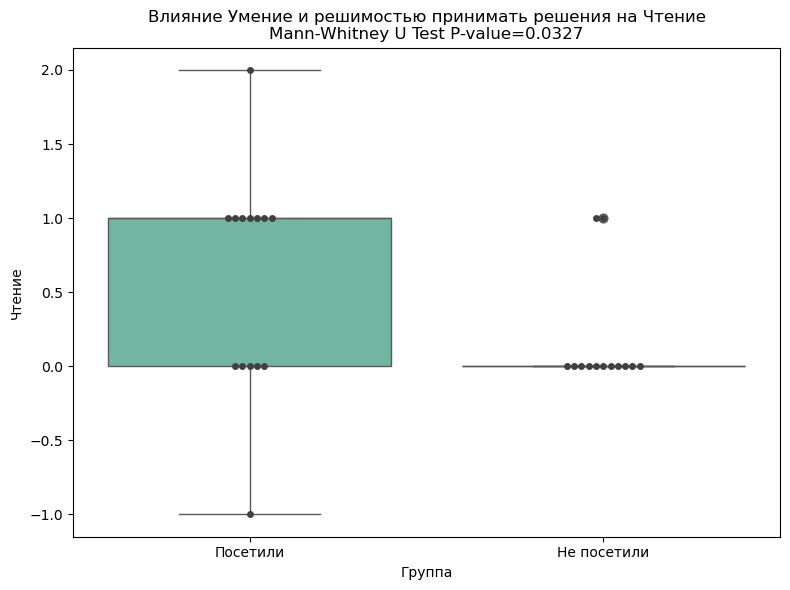

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\2293427466.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")  # Диаграмма


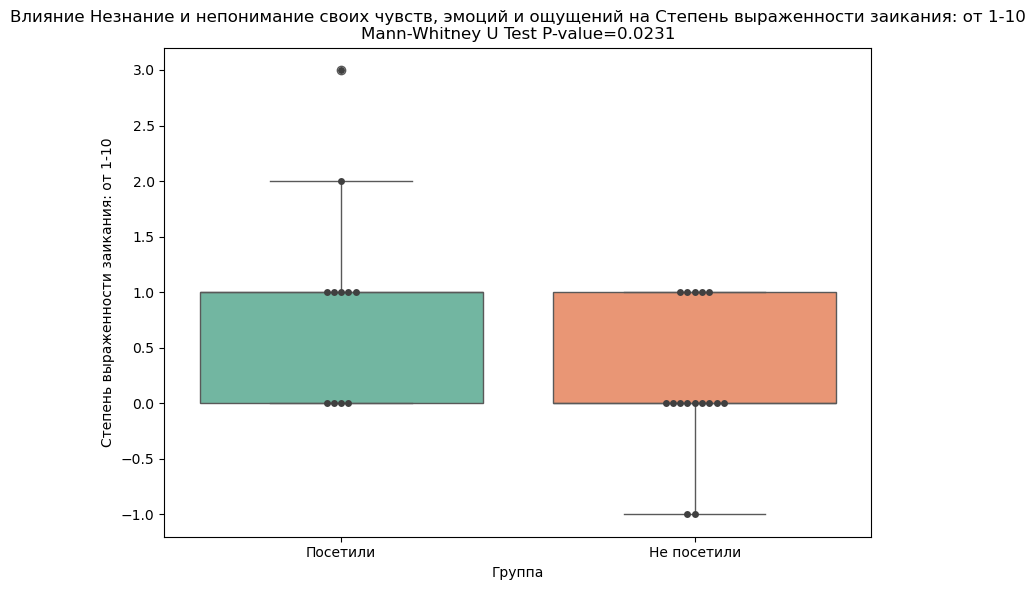

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\2293427466.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")  # Диаграмма


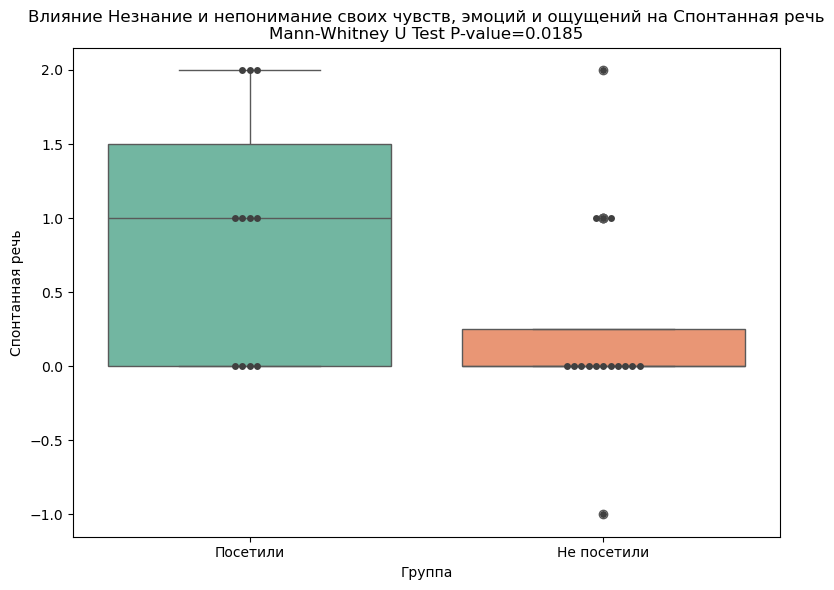

C:\Users\Алибек\AppData\Local\Temp\ipykernel_15832\2293427466.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")  # Диаграмма


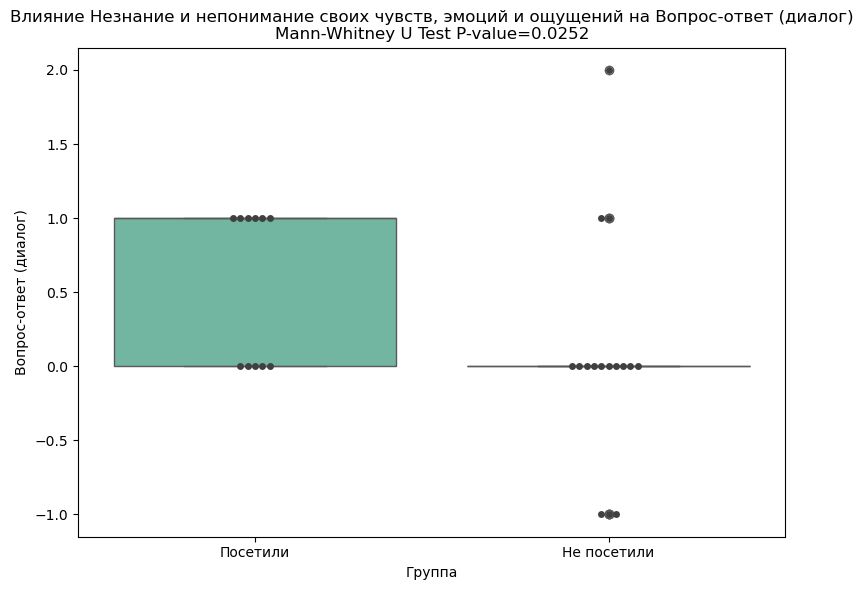

In [40]:
# Определяем колонки, для которых найдены изменения в тесте Вилкоксона
significant_columns = [
    'Степень выраженности заикания: от 1-10',
    'Спонтанная речь',
    'Чтение',
    'Пересказ',
    'Вопрос-ответ (диалог)'
]

# Словарь для хранения результатов
results = []

# Анализ влияния уроков на значимые колонки
print("\nАнализ влияния уроков на значимые метрики (только значимые результаты):")

# Проходим по всем урокам и выбранным метрикам
for lesson in attendance.columns:
    for metric in significant_columns:
        # Разделение данных на группы: посетившие и не посетившие урок
        attended = merged_data_full[merged_data_full[lesson] == 1][metric]
        not_attended = merged_data_full[merged_data_full[lesson] == 0][metric]

        # Проверяем, что группы не пустые
        if not attended.empty and not not_attended.empty:
            # Выполняем тест Манна-Уитни
            stat, p_value = mannwhitneyu(attended, not_attended, alternative='greater')

            # Если p-value меньше 0.05, добавляем результат в список
            if p_value < 0.05:
                results.append({
                    'lesson': lesson,  # Урок
                    'metric': metric,  # Метрика
                    'statistic': stat,  # Статистика теста
                    'p_value': p_value  # Значение p-value
                })

# Выводим результаты значимых изменений
for result in results:
    print("-" * 30)
    print(f"  Mann-Whitney U Test: Statistic={result['statistic']}, P-value={result['p_value']}")
    print(f"  Урок: {result['lesson']} статистически значимо влияет на: {result['metric']}.")
print("-" * 30)

# Построение графиков для значимых результатов
for result in results:
    lesson = result['lesson']
    metric = result['metric']
    stat = result['statistic']
    p_value = result['p_value']

    # Разделяем данные для построения графика
    attended = merged_data_full[merged_data_full[lesson] == 1][metric]
    not_attended = merged_data_full[merged_data_full[lesson] == 0][metric]

    # Создаем DataFrame для визуализации
    df_plot = pd.DataFrame({
        'Группа': ['Посетили'] * len(attended) + ['Не посетили'] * len(not_attended),
        'Метрика': list(attended) + list(not_attended)
    })

    # Построение коробчатой диаграммы (boxplot)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Группа', y='Метрика', data=df_plot, palette="Set2")  # Диаграмма
    sns.swarmplot(x='Группа', y='Метрика', data=df_plot, color=".25")  # Точки поверх диаграммы
    plt.title(f"Влияние {lesson} на {metric}\nMann-Whitney U Test P-value={p_value:.4f}")  # Заголовок
    plt.xlabel('Группа')  # Подпись оси X
    plt.ylabel(metric)  # Подпись оси Y
    plt.tight_layout()  # Оптимизация пространства
    plt.show()  # Отображение графика
